#Deep Impute

In [1]:
!pip install scdeep

In [2]:
!pip install -q scanpy

     |████████████████████████████████| 7.2MB 2.6MB/s 
     |████████████████████████████████| 122kB 41.8MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
%matplotlib inline 
import scdeep

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
count_dataframe = pd.read_csv('brain_counts.csv', 
                              index_col=0) 

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610010O12Rik,0610011F06Rik,0610011L14Rik,0610012G03Rik,0610012H03Rik,0610030E20Rik,0610031J06Rik,0610031O16Rik,0610037L13Rik,0610037P05Rik,0610038B21Rik,0610038L08Rik,0610039K10Rik,0610040B10Rik,0610040F04Rik,0610040J01Rik,0610043K17Rik,0910001L09Rik,100043387,1100001G20Rik,1110001A16Rik,1110001J03Rik,1110002B05Rik,1110002L01Rik,...,Zranb3,Zrsr1,Zrsr2,Zscan10,Zscan12,Zscan18,Zscan2,Zscan20,Zscan21,Zscan22,Zscan29,Zscan4a,Zscan4b,Zscan4c,Zscan4d,Zscan4e,Zscan4f,Zscan5b,Zswim1,Zswim2,Zswim3,Zswim4,Zswim5,Zswim6,Zswim7,Zufsp,Zw10,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,0,0,8,0,0,66,140,218,0,110,0,0,155,0,0,37,0,0,0,0,0,0,0,0,0,0,0,30,107,0,...,0,0,0,0,35,0,0,0,0,9,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,722,0,0,0,0,0,0,0,0,0,0,128,1,0,0,0,0,0,...,0,0,0,0,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,316,0,0,0,0,1,371,333,0,0,0,0,439,0,0,49,0,0,0,0,0,0,44,67,0,0,0,46,587,0,...,0,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,266,0,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,0,0,3,0,0,6,11,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,8,1,62,0,...,0,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,16,0,2,0,0,0,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,0,0,3,0,0,19,118,39,0,175,0,0,20,0,0,124,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0


In [7]:
metadata_dataframe = pd.read_csv('brain_metadata.csv', index_col=0)

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [9]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)

In [11]:
sc.pp.filter_genes(adata, min_counts=1000)
adata

AnnData object with n_obs × n_vars = 3401 × 15265
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'n_counts'

In [13]:
from scdeep import deep_impute

In [14]:
#from deep_impute import DeepImputeModel, DeepImputeTrainer
#from dataset import GeneExpressionDataset
import torch

In [15]:
gene_matrix = pd.DataFrame(adata.X)

In [16]:
model = deep_impute.DeepImputeModel()
gene_dataset = scdeep.dataset.GeneExpressionDataset()

In [17]:
gene_dataset.from_data(gene_matrix)
trainer = deep_impute.DeepImputeTrainer(model=model, gene_dataset=gene_dataset, batch_size=64)

Network 0: 1637 predictors, 512 targets
Network 1: 1672 predictors, 512 targets
Network 2: 1662 predictors, 512 targets
Network 3: 1619 predictors, 512 targets
Network 4: 1659 predictors, 512 targets
Network 5: 1705 predictors, 512 targets
Network 6: 1629 predictors, 512 targets
Network 7: 1688 predictors, 512 targets
Network 8: 1682 predictors, 512 targets
Network 9: 1677 predictors, 512 targets
Network 10: 1638 predictors, 512 targets
Network 11: 1647 predictors, 512 targets
Network 12: 1685 predictors, 512 targets
Network 13: 1646 predictors, 512 targets
Network 14: 1716 predictors, 512 targets
Network 15: 1706 predictors, 512 targets
Network 16: 1631 predictors, 512 targets
Network 17: 1606 predictors, 512 targets
Network 18: 1618 predictors, 512 targets
Network 19: 1663 predictors, 512 targets
Network 20: 1651 predictors, 512 targets
Network 21: 1697 predictors, 512 targets
Network 22: 1646 predictors, 512 targets
Network 23: 1684 predictors, 512 targets
Network 24: 1582 predictor

training:   0%|          | 0/100 [00:00<?, ?it/s]

module_list.0.dense_layer.weight
torch.Size([256, 1637])
module_list.0.dense_layer.bias
torch.Size([256])
module_list.0.output_layer.weight
torch.Size([512, 256])
module_list.0.output_layer.bias
torch.Size([512])
module_list.1.dense_layer.weight
torch.Size([256, 1672])
module_list.1.dense_layer.bias
torch.Size([256])
module_list.1.output_layer.weight
torch.Size([512, 256])
module_list.1.output_layer.bias
torch.Size([512])
module_list.2.dense_layer.weight
torch.Size([256, 1662])
module_list.2.dense_layer.bias
torch.Size([256])
module_list.2.output_layer.weight
torch.Size([512, 256])
module_list.2.output_layer.bias
torch.Size([512])
module_list.3.dense_layer.weight
torch.Size([256, 1619])
module_list.3.dense_layer.bias
torch.Size([256])
module_list.3.output_layer.weight
torch.Size([512, 256])
module_list.3.output_layer.bias
torch.Size([512])
module_list.4.dense_layer.weight
torch.Size([256, 1659])
module_list.4.dense_layer.bias
torch.Size([256])
module_list.4.output_layer.weight
torch.Si

training:   1%|          | 1/100 [00:15<25:05, 15.21s/it]

Iteration: 42 Loss: 4.9614

Validation Loss: 4.2116


Epoch: 2

Iteration: 0 Loss: 4.8006
Iteration: 1 Loss: 4.6525
Iteration: 2 Loss: 4.0773
Iteration: 3 Loss: 4.3490
Iteration: 4 Loss: 4.0705
Iteration: 5 Loss: 3.8383
Iteration: 6 Loss: 4.3096
Iteration: 7 Loss: 4.3385
Iteration: 8 Loss: 4.1804
Iteration: 9 Loss: 3.9219
Iteration: 10 Loss: 3.4016
Iteration: 11 Loss: 3.3637
Iteration: 12 Loss: 3.7531
Iteration: 13 Loss: 3.7224
Iteration: 14 Loss: 3.3201
Iteration: 15 Loss: 3.5111
Iteration: 16 Loss: 4.1187
Iteration: 17 Loss: 3.7682
Iteration: 18 Loss: 3.5835
Iteration: 19 Loss: 3.2438
Iteration: 20 Loss: 3.1057
Iteration: 21 Loss: 3.4694
Iteration: 22 Loss: 3.5962
Iteration: 23 Loss: 3.2749
Iteration: 24 Loss: 3.0096
Iteration: 25 Loss: 3.0948
Iteration: 26 Loss: 3.3610
Iteration: 27 Loss: 2.9634
Iteration: 28 Loss: 3.0489
Iteration: 29 Loss: 3.4724
Iteration: 30 Loss: 3.1079
Iteration: 31 Loss: 3.2376
Iteration: 32 Loss: 3.1870
Iteration: 33 Loss: 3.2001
Iteration: 34 Loss: 3.2537
I

training:   2%|▏         | 2/100 [00:29<24:36, 15.07s/it]

Iteration: 42 Loss: 2.9424

Validation Loss: 2.0007


Epoch: 3

Iteration: 0 Loss: 2.6532
Iteration: 1 Loss: 2.6924
Iteration: 2 Loss: 2.7838
Iteration: 3 Loss: 2.6134
Iteration: 4 Loss: 2.5319
Iteration: 5 Loss: 2.7331
Iteration: 6 Loss: 2.8790
Iteration: 7 Loss: 2.7568
Iteration: 8 Loss: 2.9863
Iteration: 9 Loss: 2.9337
Iteration: 10 Loss: 2.7997
Iteration: 11 Loss: 2.6557
Iteration: 12 Loss: 2.6418
Iteration: 13 Loss: 2.2843
Iteration: 14 Loss: 2.6518
Iteration: 15 Loss: 2.5688
Iteration: 16 Loss: 2.3904
Iteration: 17 Loss: 2.3859
Iteration: 18 Loss: 2.3470
Iteration: 19 Loss: 2.7669
Iteration: 20 Loss: 2.4546
Iteration: 21 Loss: 2.7740
Iteration: 22 Loss: 2.6621
Iteration: 23 Loss: 2.5436
Iteration: 24 Loss: 2.7099
Iteration: 25 Loss: 2.1225
Iteration: 26 Loss: 2.6323
Iteration: 27 Loss: 2.3733
Iteration: 28 Loss: 2.5024
Iteration: 29 Loss: 2.3648
Iteration: 30 Loss: 2.5634
Iteration: 31 Loss: 2.4134
Iteration: 32 Loss: 2.4489
Iteration: 33 Loss: 2.5077
Iteration: 34 Loss: 2.3433
I

training:   3%|▎         | 3/100 [00:44<24:12, 14.97s/it]

Iteration: 42 Loss: 2.4216

Validation Loss: 1.7291


Epoch: 4

Iteration: 0 Loss: 2.6018
Iteration: 1 Loss: 2.0956
Iteration: 2 Loss: 2.2212
Iteration: 3 Loss: 2.1832
Iteration: 4 Loss: 2.2332
Iteration: 5 Loss: 2.3095
Iteration: 6 Loss: 2.2255
Iteration: 7 Loss: 2.1160
Iteration: 8 Loss: 2.2154
Iteration: 9 Loss: 2.1154
Iteration: 10 Loss: 2.4270
Iteration: 11 Loss: 2.6097
Iteration: 12 Loss: 2.3054
Iteration: 13 Loss: 1.9616
Iteration: 14 Loss: 2.1739
Iteration: 15 Loss: 2.5424
Iteration: 16 Loss: 2.1812
Iteration: 17 Loss: 2.0688
Iteration: 18 Loss: 2.3625
Iteration: 19 Loss: 2.2531
Iteration: 20 Loss: 1.9658
Iteration: 21 Loss: 2.1821
Iteration: 22 Loss: 1.9445
Iteration: 23 Loss: 1.9252
Iteration: 24 Loss: 2.3563
Iteration: 25 Loss: 2.1667
Iteration: 26 Loss: 2.2684
Iteration: 27 Loss: 2.3900
Iteration: 28 Loss: 2.2067
Iteration: 29 Loss: 2.0436
Iteration: 30 Loss: 2.4580
Iteration: 31 Loss: 2.0927
Iteration: 32 Loss: 2.2593
Iteration: 33 Loss: 2.0467
Iteration: 34 Loss: 1.9936
I

training:   4%|▍         | 4/100 [00:59<23:50, 14.90s/it]

Iteration: 42 Loss: 2.0901

Validation Loss: 1.5656


Epoch: 5

Iteration: 0 Loss: 1.8231
Iteration: 1 Loss: 2.1535
Iteration: 2 Loss: 2.2545
Iteration: 3 Loss: 1.8776
Iteration: 4 Loss: 1.8034
Iteration: 5 Loss: 2.1051
Iteration: 6 Loss: 2.0136
Iteration: 7 Loss: 1.8925
Iteration: 8 Loss: 1.8935
Iteration: 9 Loss: 2.2817
Iteration: 10 Loss: 1.7907
Iteration: 11 Loss: 1.9407
Iteration: 12 Loss: 2.0568
Iteration: 13 Loss: 2.1741
Iteration: 14 Loss: 2.0793
Iteration: 15 Loss: 2.2843
Iteration: 16 Loss: 2.0948
Iteration: 17 Loss: 1.8098
Iteration: 18 Loss: 1.9413
Iteration: 19 Loss: 1.8480
Iteration: 20 Loss: 1.9002
Iteration: 21 Loss: 1.9790
Iteration: 22 Loss: 2.2882
Iteration: 23 Loss: 2.0570
Iteration: 24 Loss: 1.8765
Iteration: 25 Loss: 1.8803
Iteration: 26 Loss: 1.9714
Iteration: 27 Loss: 2.0201
Iteration: 28 Loss: 1.8175
Iteration: 29 Loss: 1.8534
Iteration: 30 Loss: 1.9396
Iteration: 31 Loss: 1.8117
Iteration: 32 Loss: 1.6206
Iteration: 33 Loss: 2.0528
Iteration: 34 Loss: 2.0929
I

training:   5%|▌         | 5/100 [01:14<23:32, 14.87s/it]


Validation Loss: 1.4789


Epoch: 6

Iteration: 0 Loss: 1.7167
Iteration: 1 Loss: 1.8109
Iteration: 2 Loss: 1.9199
Iteration: 3 Loss: 2.0825
Iteration: 4 Loss: 1.9792
Iteration: 5 Loss: 1.5897
Iteration: 6 Loss: 1.7126
Iteration: 7 Loss: 1.9059
Iteration: 8 Loss: 1.6601
Iteration: 9 Loss: 1.8390
Iteration: 10 Loss: 1.9761
Iteration: 11 Loss: 1.7961
Iteration: 12 Loss: 1.8568
Iteration: 13 Loss: 1.5954
Iteration: 14 Loss: 1.6735
Iteration: 15 Loss: 1.6049
Iteration: 16 Loss: 1.7861
Iteration: 17 Loss: 1.9661
Iteration: 18 Loss: 1.8452
Iteration: 19 Loss: 1.9584
Iteration: 20 Loss: 1.8761
Iteration: 21 Loss: 1.7335
Iteration: 22 Loss: 1.8957
Iteration: 23 Loss: 1.9129
Iteration: 24 Loss: 1.7630
Iteration: 25 Loss: 1.8030
Iteration: 26 Loss: 1.9343
Iteration: 27 Loss: 1.8818
Iteration: 28 Loss: 1.7890
Iteration: 29 Loss: 1.7488
Iteration: 30 Loss: 1.8149
Iteration: 31 Loss: 1.8982
Iteration: 32 Loss: 1.8476
Iteration: 33 Loss: 1.8424
Iteration: 34 Loss: 1.8304
Iteration: 35 Loss: 1.7949
I

training:   6%|▌         | 6/100 [01:29<23:15, 14.85s/it]

Iteration: 42 Loss: 1.6039

Validation Loss: 1.4041


Epoch: 7

Iteration: 0 Loss: 1.7283
Iteration: 1 Loss: 1.7547
Iteration: 2 Loss: 1.6778
Iteration: 3 Loss: 1.7752
Iteration: 4 Loss: 1.6858
Iteration: 5 Loss: 1.6995
Iteration: 6 Loss: 1.8353
Iteration: 7 Loss: 1.5916
Iteration: 8 Loss: 1.7093
Iteration: 9 Loss: 1.7126
Iteration: 10 Loss: 1.8329
Iteration: 11 Loss: 1.8234
Iteration: 12 Loss: 1.5445
Iteration: 13 Loss: 1.5725
Iteration: 14 Loss: 1.7443
Iteration: 15 Loss: 1.8849
Iteration: 16 Loss: 1.7773
Iteration: 17 Loss: 1.5843
Iteration: 18 Loss: 1.7885
Iteration: 19 Loss: 1.7926
Iteration: 20 Loss: 1.7280
Iteration: 21 Loss: 1.5548
Iteration: 22 Loss: 1.7204
Iteration: 23 Loss: 1.7688
Iteration: 24 Loss: 1.6311
Iteration: 25 Loss: 1.8454
Iteration: 26 Loss: 1.6000
Iteration: 27 Loss: 1.6040
Iteration: 28 Loss: 1.8549
Iteration: 29 Loss: 1.6025
Iteration: 30 Loss: 1.7018
Iteration: 31 Loss: 1.7179
Iteration: 32 Loss: 1.7218
Iteration: 33 Loss: 1.6143
Iteration: 34 Loss: 1.4782
I

training:   7%|▋         | 7/100 [01:43<22:57, 14.81s/it]

Iteration: 42 Loss: 1.6216

Validation Loss: 1.3833


Epoch: 8

Iteration: 0 Loss: 1.7080
Iteration: 1 Loss: 1.6320
Iteration: 2 Loss: 1.7466
Iteration: 3 Loss: 1.5709
Iteration: 4 Loss: 1.6339
Iteration: 5 Loss: 1.6336
Iteration: 6 Loss: 1.6620
Iteration: 7 Loss: 1.5918
Iteration: 8 Loss: 1.4659
Iteration: 9 Loss: 1.4768
Iteration: 10 Loss: 1.6756
Iteration: 11 Loss: 1.6516
Iteration: 12 Loss: 1.5925
Iteration: 13 Loss: 1.6275
Iteration: 14 Loss: 1.6141
Iteration: 15 Loss: 1.6194
Iteration: 16 Loss: 1.6443
Iteration: 17 Loss: 1.7954
Iteration: 18 Loss: 1.6123
Iteration: 19 Loss: 1.6494
Iteration: 20 Loss: 1.7703
Iteration: 21 Loss: 1.5266
Iteration: 22 Loss: 1.4758
Iteration: 23 Loss: 1.6011
Iteration: 24 Loss: 1.5467
Iteration: 25 Loss: 1.7024
Iteration: 26 Loss: 1.4329
Iteration: 27 Loss: 1.6248
Iteration: 28 Loss: 1.5113
Iteration: 29 Loss: 1.7701
Iteration: 30 Loss: 1.6505
Iteration: 31 Loss: 1.7901
Iteration: 32 Loss: 1.7426
Iteration: 33 Loss: 1.5734
Iteration: 34 Loss: 1.6413
I

training:   8%|▊         | 8/100 [01:58<22:42, 14.80s/it]

Iteration: 42 Loss: 1.5993

Validation Loss: 1.3544


Epoch: 9

Iteration: 0 Loss: 1.6058
Iteration: 1 Loss: 1.6818
Iteration: 2 Loss: 1.5460
Iteration: 3 Loss: 1.4461
Iteration: 4 Loss: 1.6375
Iteration: 5 Loss: 1.6198
Iteration: 6 Loss: 1.5091
Iteration: 7 Loss: 1.5009
Iteration: 8 Loss: 1.6705
Iteration: 9 Loss: 1.3671
Iteration: 10 Loss: 1.5366
Iteration: 11 Loss: 1.6838
Iteration: 12 Loss: 1.5791
Iteration: 13 Loss: 1.5033
Iteration: 14 Loss: 1.4863
Iteration: 15 Loss: 1.3820
Iteration: 16 Loss: 1.8658
Iteration: 17 Loss: 1.5971
Iteration: 18 Loss: 1.6443
Iteration: 19 Loss: 1.4750
Iteration: 20 Loss: 1.6086
Iteration: 21 Loss: 1.6654
Iteration: 22 Loss: 1.5373
Iteration: 23 Loss: 1.4967
Iteration: 24 Loss: 1.4629
Iteration: 25 Loss: 1.6628
Iteration: 26 Loss: 1.4052
Iteration: 27 Loss: 1.6785
Iteration: 28 Loss: 1.5524
Iteration: 29 Loss: 1.4558
Iteration: 30 Loss: 1.7062
Iteration: 31 Loss: 1.5708
Iteration: 32 Loss: 1.5776
Iteration: 33 Loss: 1.4575
Iteration: 34 Loss: 1.4865
I

training:   9%|▉         | 9/100 [02:13<22:27, 14.81s/it]

Iteration: 42 Loss: 1.4731

Validation Loss: 1.3312


Epoch: 10

Iteration: 0 Loss: 1.4238
Iteration: 1 Loss: 1.5957
Iteration: 2 Loss: 1.4742
Iteration: 3 Loss: 1.4770
Iteration: 4 Loss: 1.6569
Iteration: 5 Loss: 1.4622
Iteration: 6 Loss: 1.5015
Iteration: 7 Loss: 1.5850
Iteration: 8 Loss: 1.5812
Iteration: 9 Loss: 1.4450
Iteration: 10 Loss: 1.3633
Iteration: 11 Loss: 1.5161
Iteration: 12 Loss: 1.4666
Iteration: 13 Loss: 1.4987
Iteration: 14 Loss: 1.5895
Iteration: 15 Loss: 1.5206
Iteration: 16 Loss: 1.6380
Iteration: 17 Loss: 1.5404
Iteration: 18 Loss: 1.5596
Iteration: 19 Loss: 1.5406
Iteration: 20 Loss: 1.3816
Iteration: 21 Loss: 1.5555
Iteration: 22 Loss: 1.7449
Iteration: 23 Loss: 1.5369
Iteration: 24 Loss: 1.5330
Iteration: 25 Loss: 1.3467
Iteration: 26 Loss: 1.4250
Iteration: 27 Loss: 1.4826
Iteration: 28 Loss: 1.5463
Iteration: 29 Loss: 1.5033
Iteration: 30 Loss: 1.5847
Iteration: 31 Loss: 1.4966
Iteration: 32 Loss: 1.4587
Iteration: 33 Loss: 1.4265
Iteration: 34 Loss: 1.5243


training:  10%|█         | 10/100 [02:28<22:10, 14.79s/it]

Iteration: 42 Loss: 1.3494

Validation Loss: 1.3181


Epoch: 11

Iteration: 0 Loss: 1.4118
Iteration: 1 Loss: 1.4809
Iteration: 2 Loss: 1.5379
Iteration: 3 Loss: 1.5122
Iteration: 4 Loss: 1.6579
Iteration: 5 Loss: 1.5045
Iteration: 6 Loss: 1.4492
Iteration: 7 Loss: 1.3961
Iteration: 8 Loss: 1.4204
Iteration: 9 Loss: 1.4375
Iteration: 10 Loss: 1.4469
Iteration: 11 Loss: 1.5141
Iteration: 12 Loss: 1.5283
Iteration: 13 Loss: 1.4570
Iteration: 14 Loss: 1.4972
Iteration: 15 Loss: 1.4865
Iteration: 16 Loss: 1.3981
Iteration: 17 Loss: 1.4531
Iteration: 18 Loss: 1.5047
Iteration: 19 Loss: 1.4464
Iteration: 20 Loss: 1.5729
Iteration: 21 Loss: 1.3858
Iteration: 22 Loss: 1.4822
Iteration: 23 Loss: 1.5970
Iteration: 24 Loss: 1.6927
Iteration: 25 Loss: 1.5303
Iteration: 26 Loss: 1.3990
Iteration: 27 Loss: 1.4553
Iteration: 28 Loss: 1.4918
Iteration: 29 Loss: 1.2359
Iteration: 30 Loss: 1.4745
Iteration: 31 Loss: 1.3871
Iteration: 32 Loss: 1.3201
Iteration: 33 Loss: 1.3865
Iteration: 34 Loss: 1.4475


training:  11%|█         | 11/100 [02:42<21:56, 14.79s/it]

Iteration: 42 Loss: 1.4091

Validation Loss: 1.2988


Epoch: 12

Iteration: 0 Loss: 1.4104
Iteration: 1 Loss: 1.3254
Iteration: 2 Loss: 1.4658
Iteration: 3 Loss: 1.5498
Iteration: 4 Loss: 1.5150
Iteration: 5 Loss: 1.2842
Iteration: 6 Loss: 1.4560
Iteration: 7 Loss: 1.4214
Iteration: 8 Loss: 1.6132
Iteration: 9 Loss: 1.4543
Iteration: 10 Loss: 1.3499
Iteration: 11 Loss: 1.5277
Iteration: 12 Loss: 1.5185
Iteration: 13 Loss: 1.3774
Iteration: 14 Loss: 1.4688
Iteration: 15 Loss: 1.4712
Iteration: 16 Loss: 1.5520
Iteration: 17 Loss: 1.4929
Iteration: 18 Loss: 1.4887
Iteration: 19 Loss: 1.3743
Iteration: 20 Loss: 1.3190
Iteration: 21 Loss: 1.4189
Iteration: 22 Loss: 1.4790
Iteration: 23 Loss: 1.2175
Iteration: 24 Loss: 1.3277
Iteration: 25 Loss: 1.5255
Iteration: 26 Loss: 1.5008
Iteration: 27 Loss: 1.2867
Iteration: 28 Loss: 1.4005
Iteration: 29 Loss: 1.3335
Iteration: 30 Loss: 1.5240
Iteration: 31 Loss: 1.4501
Iteration: 32 Loss: 1.4765
Iteration: 33 Loss: 1.5013
Iteration: 34 Loss: 1.3199


training:  12%|█▏        | 12/100 [02:57<21:43, 14.81s/it]


Validation Loss: 1.2837


Epoch: 13

Iteration: 0 Loss: 1.4283
Iteration: 1 Loss: 1.5003
Iteration: 2 Loss: 1.4889
Iteration: 3 Loss: 1.5447
Iteration: 4 Loss: 1.3950
Iteration: 5 Loss: 1.4589
Iteration: 6 Loss: 1.3260
Iteration: 7 Loss: 1.4142
Iteration: 8 Loss: 1.4858
Iteration: 9 Loss: 1.3194
Iteration: 10 Loss: 1.4438
Iteration: 11 Loss: 1.4693
Iteration: 12 Loss: 1.3189
Iteration: 13 Loss: 1.4169
Iteration: 14 Loss: 1.4328
Iteration: 15 Loss: 1.3161
Iteration: 16 Loss: 1.4046
Iteration: 17 Loss: 1.4067
Iteration: 18 Loss: 1.4008
Iteration: 19 Loss: 1.5016
Iteration: 20 Loss: 1.4090
Iteration: 21 Loss: 1.4709
Iteration: 22 Loss: 1.5282
Iteration: 23 Loss: 1.4105
Iteration: 24 Loss: 1.4446
Iteration: 25 Loss: 1.4233
Iteration: 26 Loss: 1.2435
Iteration: 27 Loss: 1.2712
Iteration: 28 Loss: 1.5290
Iteration: 29 Loss: 1.3595
Iteration: 30 Loss: 1.4039
Iteration: 31 Loss: 1.2970
Iteration: 32 Loss: 1.3702
Iteration: 33 Loss: 1.4592
Iteration: 34 Loss: 1.1626
Iteration: 35 Loss: 1.2610


training:  13%|█▎        | 13/100 [03:12<21:26, 14.79s/it]

Iteration: 42 Loss: 1.1901

Validation Loss: 1.2847


Epoch: 14

Iteration: 0 Loss: 1.1757
Iteration: 1 Loss: 1.2734
Iteration: 2 Loss: 1.3511
Iteration: 3 Loss: 1.2576
Iteration: 4 Loss: 1.4235
Iteration: 5 Loss: 1.3423
Iteration: 6 Loss: 1.3734
Iteration: 7 Loss: 1.3828
Iteration: 8 Loss: 1.3862
Iteration: 9 Loss: 1.3410
Iteration: 10 Loss: 1.4496
Iteration: 11 Loss: 1.4017
Iteration: 12 Loss: 1.3089
Iteration: 13 Loss: 1.2949
Iteration: 14 Loss: 1.3643
Iteration: 15 Loss: 1.4531
Iteration: 16 Loss: 1.2432
Iteration: 17 Loss: 1.4764
Iteration: 18 Loss: 1.4683
Iteration: 19 Loss: 1.5220
Iteration: 20 Loss: 1.3068
Iteration: 21 Loss: 1.3102
Iteration: 22 Loss: 1.4772
Iteration: 23 Loss: 1.3350
Iteration: 24 Loss: 1.5032
Iteration: 25 Loss: 1.4251
Iteration: 26 Loss: 1.2485
Iteration: 27 Loss: 1.4736
Iteration: 28 Loss: 1.2563
Iteration: 29 Loss: 1.4461
Iteration: 30 Loss: 1.3572
Iteration: 31 Loss: 1.3857
Iteration: 32 Loss: 1.4170
Iteration: 33 Loss: 1.5024
Iteration: 34 Loss: 1.2421


training:  14%|█▍        | 14/100 [03:27<21:11, 14.78s/it]

Iteration: 42 Loss: 1.2311

Validation Loss: 1.2726


Epoch: 15

Iteration: 0 Loss: 1.5776
Iteration: 1 Loss: 1.4515
Iteration: 2 Loss: 1.3532
Iteration: 3 Loss: 1.1008
Iteration: 4 Loss: 1.4690
Iteration: 5 Loss: 1.2437
Iteration: 6 Loss: 1.2986
Iteration: 7 Loss: 1.3347
Iteration: 8 Loss: 1.3164
Iteration: 9 Loss: 1.4697
Iteration: 10 Loss: 1.2764
Iteration: 11 Loss: 1.3143
Iteration: 12 Loss: 1.2982
Iteration: 13 Loss: 1.4280
Iteration: 14 Loss: 1.3326
Iteration: 15 Loss: 1.3313
Iteration: 16 Loss: 1.3168
Iteration: 17 Loss: 1.2719
Iteration: 18 Loss: 1.3217
Iteration: 19 Loss: 1.3066
Iteration: 20 Loss: 1.4130
Iteration: 21 Loss: 1.2678
Iteration: 22 Loss: 1.2815
Iteration: 23 Loss: 1.2558
Iteration: 24 Loss: 1.4961
Iteration: 25 Loss: 1.3807
Iteration: 26 Loss: 1.3404
Iteration: 27 Loss: 1.4377
Iteration: 28 Loss: 1.3330
Iteration: 29 Loss: 1.3822
Iteration: 30 Loss: 1.3083
Iteration: 31 Loss: 1.4088
Iteration: 32 Loss: 1.3531
Iteration: 33 Loss: 1.4173
Iteration: 34 Loss: 1.3785


training:  15%|█▌        | 15/100 [03:42<20:55, 14.77s/it]

Iteration: 42 Loss: 1.5555

Validation Loss: 1.2729


Epoch: 16

Iteration: 0 Loss: 1.3216
Iteration: 1 Loss: 1.2861
Iteration: 2 Loss: 1.3215
Iteration: 3 Loss: 1.2764
Iteration: 4 Loss: 1.2777
Iteration: 5 Loss: 1.4799
Iteration: 6 Loss: 1.3527
Iteration: 7 Loss: 1.2376
Iteration: 8 Loss: 1.3210
Iteration: 9 Loss: 1.2634
Iteration: 10 Loss: 1.3459
Iteration: 11 Loss: 1.3315
Iteration: 12 Loss: 1.2654
Iteration: 13 Loss: 1.3073
Iteration: 14 Loss: 1.1227
Iteration: 15 Loss: 1.3284
Iteration: 16 Loss: 1.3217
Iteration: 17 Loss: 1.2690
Iteration: 18 Loss: 1.4050
Iteration: 19 Loss: 1.5546
Iteration: 20 Loss: 1.4192
Iteration: 21 Loss: 1.2855
Iteration: 22 Loss: 1.2506
Iteration: 23 Loss: 1.3642
Iteration: 24 Loss: 1.3162
Iteration: 25 Loss: 1.2222
Iteration: 26 Loss: 1.3236
Iteration: 27 Loss: 1.2579
Iteration: 28 Loss: 1.3277
Iteration: 29 Loss: 1.4090
Iteration: 30 Loss: 1.3470
Iteration: 31 Loss: 1.3444
Iteration: 32 Loss: 1.3242
Iteration: 33 Loss: 1.1811
Iteration: 34 Loss: 1.4770


training:  16%|█▌        | 16/100 [03:56<20:39, 14.76s/it]

Iteration: 42 Loss: 1.2604

Validation Loss: 1.2673


Epoch: 17

Iteration: 0 Loss: 1.3326
Iteration: 1 Loss: 1.3627
Iteration: 2 Loss: 1.2788
Iteration: 3 Loss: 1.3548
Iteration: 4 Loss: 1.3852
Iteration: 5 Loss: 1.3303
Iteration: 6 Loss: 1.2855
Iteration: 7 Loss: 1.3131
Iteration: 8 Loss: 1.3269
Iteration: 9 Loss: 1.3444
Iteration: 10 Loss: 1.3990
Iteration: 11 Loss: 1.1782
Iteration: 12 Loss: 1.1641
Iteration: 13 Loss: 1.1740
Iteration: 14 Loss: 1.3501
Iteration: 15 Loss: 1.5157
Iteration: 16 Loss: 1.3372
Iteration: 17 Loss: 1.2402
Iteration: 18 Loss: 1.3121
Iteration: 19 Loss: 1.2904
Iteration: 20 Loss: 1.3361
Iteration: 21 Loss: 1.3355
Iteration: 22 Loss: 1.2407
Iteration: 23 Loss: 1.2767
Iteration: 24 Loss: 1.4721
Iteration: 25 Loss: 1.3301
Iteration: 26 Loss: 1.2716
Iteration: 27 Loss: 1.4619
Iteration: 28 Loss: 1.3820
Iteration: 29 Loss: 1.3429
Iteration: 30 Loss: 1.1966
Iteration: 31 Loss: 1.1703
Iteration: 32 Loss: 1.3234
Iteration: 33 Loss: 1.1677
Iteration: 34 Loss: 1.2160


training:  17%|█▋        | 17/100 [04:11<20:24, 14.76s/it]


Validation Loss: 1.2571


Epoch: 18

Iteration: 0 Loss: 1.2622
Iteration: 1 Loss: 1.2375
Iteration: 2 Loss: 1.2020
Iteration: 3 Loss: 1.3079
Iteration: 4 Loss: 1.1832
Iteration: 5 Loss: 1.4780
Iteration: 6 Loss: 1.2004
Iteration: 7 Loss: 1.3140
Iteration: 8 Loss: 1.3793
Iteration: 9 Loss: 1.2188
Iteration: 10 Loss: 1.3500
Iteration: 11 Loss: 1.3369
Iteration: 12 Loss: 1.3881
Iteration: 13 Loss: 1.2269
Iteration: 14 Loss: 1.2326
Iteration: 15 Loss: 1.2239
Iteration: 16 Loss: 1.3064
Iteration: 17 Loss: 1.2316
Iteration: 18 Loss: 1.3807
Iteration: 19 Loss: 1.4395
Iteration: 20 Loss: 1.3446
Iteration: 21 Loss: 1.3741
Iteration: 22 Loss: 1.3028
Iteration: 23 Loss: 1.2626
Iteration: 24 Loss: 1.2573
Iteration: 25 Loss: 1.3215
Iteration: 26 Loss: 1.2513
Iteration: 27 Loss: 1.1322
Iteration: 28 Loss: 1.3237
Iteration: 29 Loss: 1.2555
Iteration: 30 Loss: 1.2809
Iteration: 31 Loss: 1.3536
Iteration: 32 Loss: 1.2041
Iteration: 33 Loss: 1.2284
Iteration: 34 Loss: 1.3635
Iteration: 35 Loss: 1.2442


training:  18%|█▊        | 18/100 [04:26<20:09, 14.75s/it]

Iteration: 42 Loss: 1.3472

Validation Loss: 1.2637


Epoch: 19

Iteration: 0 Loss: 1.1897
Iteration: 1 Loss: 1.2313
Iteration: 2 Loss: 1.1950
Iteration: 3 Loss: 1.2043
Iteration: 4 Loss: 1.2853
Iteration: 5 Loss: 1.1939
Iteration: 6 Loss: 1.1382
Iteration: 7 Loss: 1.2139
Iteration: 8 Loss: 1.3900
Iteration: 9 Loss: 1.2792
Iteration: 10 Loss: 1.3057
Iteration: 11 Loss: 1.1514
Iteration: 12 Loss: 1.3160
Iteration: 13 Loss: 1.2917
Iteration: 14 Loss: 1.2556
Iteration: 15 Loss: 1.2680
Iteration: 16 Loss: 1.2168
Iteration: 17 Loss: 1.2880
Iteration: 18 Loss: 1.2753
Iteration: 19 Loss: 1.2527
Iteration: 20 Loss: 1.2357
Iteration: 21 Loss: 1.3110
Iteration: 22 Loss: 1.3310
Iteration: 23 Loss: 1.3606
Iteration: 24 Loss: 1.3005
Iteration: 25 Loss: 1.3835
Iteration: 26 Loss: 1.2712
Iteration: 27 Loss: 1.2157
Iteration: 28 Loss: 1.3341
Iteration: 29 Loss: 1.2595
Iteration: 30 Loss: 1.2466
Iteration: 31 Loss: 1.4114
Iteration: 32 Loss: 1.3885
Iteration: 33 Loss: 1.3524
Iteration: 34 Loss: 1.1678


training:  19%|█▉        | 19/100 [04:41<19:56, 14.77s/it]

Iteration: 42 Loss: 1.2178

Validation Loss: 1.2619


Epoch: 20

Iteration: 0 Loss: 1.1825
Iteration: 1 Loss: 1.2686
Iteration: 2 Loss: 1.2613
Iteration: 3 Loss: 1.3200
Iteration: 4 Loss: 1.2359
Iteration: 5 Loss: 1.2697
Iteration: 6 Loss: 1.2000
Iteration: 7 Loss: 1.2192
Iteration: 8 Loss: 1.3080
Iteration: 9 Loss: 1.2098
Iteration: 10 Loss: 1.1888
Iteration: 11 Loss: 1.2759
Iteration: 12 Loss: 1.2239
Iteration: 13 Loss: 1.2468
Iteration: 14 Loss: 1.2225
Iteration: 15 Loss: 1.3941
Iteration: 16 Loss: 1.1424
Iteration: 17 Loss: 1.2476
Iteration: 18 Loss: 1.2952
Iteration: 19 Loss: 1.2354
Iteration: 20 Loss: 1.2926
Iteration: 21 Loss: 1.3083
Iteration: 22 Loss: 1.0931
Iteration: 23 Loss: 1.2019
Iteration: 24 Loss: 1.2630
Iteration: 25 Loss: 1.3206
Iteration: 26 Loss: 1.3340
Iteration: 27 Loss: 1.3070
Iteration: 28 Loss: 1.2490
Iteration: 29 Loss: 1.1769
Iteration: 30 Loss: 1.1739
Iteration: 31 Loss: 1.2680
Iteration: 32 Loss: 1.2212
Iteration: 33 Loss: 1.1340
Iteration: 34 Loss: 1.1950


training:  20%|██        | 20/100 [04:55<19:39, 14.75s/it]

Iteration: 42 Loss: 1.4143

Validation Loss: 1.2563


Epoch: 21

Iteration: 0 Loss: 1.2249
Iteration: 1 Loss: 1.1792
Iteration: 2 Loss: 1.2034
Iteration: 3 Loss: 1.3136
Iteration: 4 Loss: 1.2648
Iteration: 5 Loss: 1.1512
Iteration: 6 Loss: 1.1666
Iteration: 7 Loss: 1.3351
Iteration: 8 Loss: 1.1745
Iteration: 9 Loss: 1.3183
Iteration: 10 Loss: 1.1766
Iteration: 11 Loss: 1.3023
Iteration: 12 Loss: 1.3642
Iteration: 13 Loss: 1.2729
Iteration: 14 Loss: 1.2614
Iteration: 15 Loss: 1.2688
Iteration: 16 Loss: 1.3489
Iteration: 17 Loss: 1.3250
Iteration: 18 Loss: 1.1157
Iteration: 19 Loss: 1.2043
Iteration: 20 Loss: 1.2272
Iteration: 21 Loss: 1.1977
Iteration: 22 Loss: 1.0718
Iteration: 23 Loss: 1.2712
Iteration: 24 Loss: 1.2111
Iteration: 25 Loss: 1.2433
Iteration: 26 Loss: 1.1585
Iteration: 27 Loss: 1.2023
Iteration: 28 Loss: 1.2336
Iteration: 29 Loss: 1.2874
Iteration: 30 Loss: 1.0739
Iteration: 31 Loss: 1.3049
Iteration: 32 Loss: 1.2259
Iteration: 33 Loss: 1.3075
Iteration: 34 Loss: 1.1713


training:  21%|██        | 21/100 [05:10<19:25, 14.76s/it]

Iteration: 42 Loss: 1.2170

Validation Loss: 1.2531


Epoch: 22

Iteration: 0 Loss: 1.1993
Iteration: 1 Loss: 1.2127
Iteration: 2 Loss: 1.2758
Iteration: 3 Loss: 1.1235
Iteration: 4 Loss: 1.2309
Iteration: 5 Loss: 1.2690
Iteration: 6 Loss: 1.1992
Iteration: 7 Loss: 1.1396
Iteration: 8 Loss: 1.2582
Iteration: 9 Loss: 1.1737
Iteration: 10 Loss: 1.1763
Iteration: 11 Loss: 1.3338
Iteration: 12 Loss: 1.2088
Iteration: 13 Loss: 1.1874
Iteration: 14 Loss: 1.2354
Iteration: 15 Loss: 1.3426
Iteration: 16 Loss: 1.2918
Iteration: 17 Loss: 1.0968
Iteration: 18 Loss: 1.1425
Iteration: 19 Loss: 1.2281
Iteration: 20 Loss: 1.2329
Iteration: 21 Loss: 1.2428
Iteration: 22 Loss: 1.2200
Iteration: 23 Loss: 1.1640
Iteration: 24 Loss: 1.1958
Iteration: 25 Loss: 1.1614
Iteration: 26 Loss: 1.2238
Iteration: 27 Loss: 1.2187
Iteration: 28 Loss: 1.0810
Iteration: 29 Loss: 1.3121
Iteration: 30 Loss: 1.1586
Iteration: 31 Loss: 1.1308
Iteration: 32 Loss: 1.2496
Iteration: 33 Loss: 1.4528
Iteration: 34 Loss: 1.2016


training:  22%|██▏       | 22/100 [05:25<19:12, 14.77s/it]

Iteration: 42 Loss: 1.1776

Validation Loss: 1.2564


Epoch: 23

Iteration: 0 Loss: 1.3219
Iteration: 1 Loss: 1.1957
Iteration: 2 Loss: 1.1816
Iteration: 3 Loss: 1.0855
Iteration: 4 Loss: 1.2835
Iteration: 5 Loss: 1.1683
Iteration: 6 Loss: 1.2677
Iteration: 7 Loss: 1.1032
Iteration: 8 Loss: 1.2836
Iteration: 9 Loss: 1.1958
Iteration: 10 Loss: 1.2521
Iteration: 11 Loss: 1.1639
Iteration: 12 Loss: 1.1359
Iteration: 13 Loss: 1.2136
Iteration: 14 Loss: 1.2341
Iteration: 15 Loss: 1.3063
Iteration: 16 Loss: 1.1608
Iteration: 17 Loss: 1.1895
Iteration: 18 Loss: 1.3130
Iteration: 19 Loss: 1.1789
Iteration: 20 Loss: 1.1216
Iteration: 21 Loss: 1.2104
Iteration: 22 Loss: 1.1474
Iteration: 23 Loss: 1.0999
Iteration: 24 Loss: 1.2924
Iteration: 25 Loss: 1.3211
Iteration: 26 Loss: 1.2667
Iteration: 27 Loss: 1.2332
Iteration: 28 Loss: 1.2380
Iteration: 29 Loss: 0.9854
Iteration: 30 Loss: 1.2516
Iteration: 31 Loss: 1.1634
Iteration: 32 Loss: 1.1003
Iteration: 33 Loss: 1.1093
Iteration: 34 Loss: 1.1672


training:  23%|██▎       | 23/100 [05:40<18:55, 14.75s/it]

Iteration: 42 Loss: 1.5034

Validation Loss: 1.2516


Epoch: 24

Iteration: 0 Loss: 1.2300
Iteration: 1 Loss: 1.1697
Iteration: 2 Loss: 1.1847
Iteration: 3 Loss: 1.2053
Iteration: 4 Loss: 1.0856
Iteration: 5 Loss: 1.2947
Iteration: 6 Loss: 1.2807
Iteration: 7 Loss: 1.1877
Iteration: 8 Loss: 1.2049
Iteration: 9 Loss: 1.1941
Iteration: 10 Loss: 1.2089
Iteration: 11 Loss: 1.0782
Iteration: 12 Loss: 1.2152
Iteration: 13 Loss: 1.1298
Iteration: 14 Loss: 1.1862
Iteration: 15 Loss: 1.2505
Iteration: 16 Loss: 1.0592
Iteration: 17 Loss: 1.3765
Iteration: 18 Loss: 1.2268
Iteration: 19 Loss: 1.1118
Iteration: 20 Loss: 1.1322
Iteration: 21 Loss: 1.1900
Iteration: 22 Loss: 1.1354
Iteration: 23 Loss: 1.2770
Iteration: 24 Loss: 1.1569
Iteration: 25 Loss: 1.2278
Iteration: 26 Loss: 1.1907
Iteration: 27 Loss: 1.0804
Iteration: 28 Loss: 1.2296
Iteration: 29 Loss: 1.1621
Iteration: 30 Loss: 1.2259
Iteration: 31 Loss: 1.1096
Iteration: 32 Loss: 1.2237
Iteration: 33 Loss: 1.2216
Iteration: 34 Loss: 1.1981


training:  24%|██▍       | 24/100 [05:54<18:41, 14.76s/it]


Validation Loss: 1.2409


Epoch: 25

Iteration: 0 Loss: 1.3493
Iteration: 1 Loss: 1.2393
Iteration: 2 Loss: 1.1429
Iteration: 3 Loss: 1.1963
Iteration: 4 Loss: 1.1160
Iteration: 5 Loss: 1.1594
Iteration: 6 Loss: 1.2228
Iteration: 7 Loss: 1.2064
Iteration: 8 Loss: 1.1043
Iteration: 9 Loss: 1.2156
Iteration: 10 Loss: 1.1353
Iteration: 11 Loss: 1.2110
Iteration: 12 Loss: 1.1458
Iteration: 13 Loss: 1.2571
Iteration: 14 Loss: 1.1899
Iteration: 15 Loss: 1.0770
Iteration: 16 Loss: 1.2523
Iteration: 17 Loss: 1.2045
Iteration: 18 Loss: 1.1192
Iteration: 19 Loss: 1.1652
Iteration: 20 Loss: 1.1042
Iteration: 21 Loss: 1.0934
Iteration: 22 Loss: 1.2491
Iteration: 23 Loss: 1.2102
Iteration: 24 Loss: 1.1335
Iteration: 25 Loss: 1.1325
Iteration: 26 Loss: 1.2600
Iteration: 27 Loss: 1.1019
Iteration: 28 Loss: 1.3614
Iteration: 29 Loss: 1.2662
Iteration: 30 Loss: 1.1786
Iteration: 31 Loss: 1.1010
Iteration: 32 Loss: 1.0811
Iteration: 33 Loss: 1.2309
Iteration: 34 Loss: 1.0907
Iteration: 35 Loss: 1.0998


training:  25%|██▌       | 25/100 [06:09<18:26, 14.76s/it]

Iteration: 42 Loss: 1.1497

Validation Loss: 1.2500


Epoch: 26

Iteration: 0 Loss: 1.0872
Iteration: 1 Loss: 1.1110
Iteration: 2 Loss: 1.1725
Iteration: 3 Loss: 1.1576
Iteration: 4 Loss: 0.9700
Iteration: 5 Loss: 1.1882
Iteration: 6 Loss: 1.2832
Iteration: 7 Loss: 1.1871
Iteration: 8 Loss: 1.1988
Iteration: 9 Loss: 1.2083
Iteration: 10 Loss: 1.2543
Iteration: 11 Loss: 1.1959
Iteration: 12 Loss: 1.0596
Iteration: 13 Loss: 1.0846
Iteration: 14 Loss: 1.3919
Iteration: 15 Loss: 1.1729
Iteration: 16 Loss: 1.2248
Iteration: 17 Loss: 1.1414
Iteration: 18 Loss: 1.1070
Iteration: 19 Loss: 1.0797
Iteration: 20 Loss: 1.1847
Iteration: 21 Loss: 1.0579
Iteration: 22 Loss: 1.1771
Iteration: 23 Loss: 1.1394
Iteration: 24 Loss: 1.2191
Iteration: 25 Loss: 1.1255
Iteration: 26 Loss: 1.1009
Iteration: 27 Loss: 1.0917
Iteration: 28 Loss: 1.2246
Iteration: 29 Loss: 1.0367
Iteration: 30 Loss: 1.2375
Iteration: 31 Loss: 1.1102
Iteration: 32 Loss: 1.1782
Iteration: 33 Loss: 1.2239
Iteration: 34 Loss: 1.2559


training:  26%|██▌       | 26/100 [06:24<18:12, 14.76s/it]

Iteration: 42 Loss: 1.2834

Validation Loss: 1.2344


Epoch: 27

Iteration: 0 Loss: 1.2006
Iteration: 1 Loss: 1.2329
Iteration: 2 Loss: 1.1776
Iteration: 3 Loss: 1.2037
Iteration: 4 Loss: 1.1911
Iteration: 5 Loss: 1.1025
Iteration: 6 Loss: 1.1844
Iteration: 7 Loss: 1.1070
Iteration: 8 Loss: 1.1697
Iteration: 9 Loss: 1.1283
Iteration: 10 Loss: 1.2214
Iteration: 11 Loss: 1.1305
Iteration: 12 Loss: 1.0679
Iteration: 13 Loss: 1.0688
Iteration: 14 Loss: 1.2098
Iteration: 15 Loss: 1.1255
Iteration: 16 Loss: 1.1552
Iteration: 17 Loss: 1.1812
Iteration: 18 Loss: 1.1132
Iteration: 19 Loss: 1.1454
Iteration: 20 Loss: 1.1527
Iteration: 21 Loss: 1.2649
Iteration: 22 Loss: 1.1110
Iteration: 23 Loss: 1.2453
Iteration: 24 Loss: 1.1315
Iteration: 25 Loss: 1.1647
Iteration: 26 Loss: 1.0679
Iteration: 27 Loss: 1.1402
Iteration: 28 Loss: 1.1704
Iteration: 29 Loss: 1.1615
Iteration: 30 Loss: 1.1274
Iteration: 31 Loss: 1.2442
Iteration: 32 Loss: 1.2270
Iteration: 33 Loss: 1.0761
Iteration: 34 Loss: 1.1743


training:  27%|██▋       | 27/100 [06:39<17:59, 14.79s/it]

Iteration: 42 Loss: 1.1129

Validation Loss: 1.2384


Epoch: 28

Iteration: 0 Loss: 1.0796
Iteration: 1 Loss: 1.0455
Iteration: 2 Loss: 1.2116
Iteration: 3 Loss: 1.0954
Iteration: 4 Loss: 1.1309
Iteration: 5 Loss: 1.1362
Iteration: 6 Loss: 1.1969
Iteration: 7 Loss: 1.1681
Iteration: 8 Loss: 1.0754
Iteration: 9 Loss: 1.0808
Iteration: 10 Loss: 1.1823
Iteration: 11 Loss: 1.0728
Iteration: 12 Loss: 1.0457
Iteration: 13 Loss: 1.1066
Iteration: 14 Loss: 1.1036
Iteration: 15 Loss: 1.2035
Iteration: 16 Loss: 1.1222
Iteration: 17 Loss: 1.1375
Iteration: 18 Loss: 1.1361
Iteration: 19 Loss: 1.2664
Iteration: 20 Loss: 1.2259
Iteration: 21 Loss: 1.1202
Iteration: 22 Loss: 1.1263
Iteration: 23 Loss: 1.0904
Iteration: 24 Loss: 1.1023
Iteration: 25 Loss: 1.1898
Iteration: 26 Loss: 1.0738
Iteration: 27 Loss: 1.1716
Iteration: 28 Loss: 1.2089
Iteration: 29 Loss: 1.0770
Iteration: 30 Loss: 1.0895
Iteration: 31 Loss: 1.1489
Iteration: 32 Loss: 1.1485
Iteration: 33 Loss: 1.2129
Iteration: 34 Loss: 1.2712


training:  28%|██▊       | 28/100 [06:54<17:45, 14.80s/it]

Iteration: 42 Loss: 1.0769

Validation Loss: 1.2407


Epoch: 29

Iteration: 0 Loss: 1.2056
Iteration: 1 Loss: 1.2052
Iteration: 2 Loss: 1.1630
Iteration: 3 Loss: 1.0588
Iteration: 4 Loss: 1.0542
Iteration: 5 Loss: 1.1814
Iteration: 6 Loss: 1.1718
Iteration: 7 Loss: 0.9976
Iteration: 8 Loss: 1.2019
Iteration: 9 Loss: 1.2088
Iteration: 10 Loss: 1.1358
Iteration: 11 Loss: 1.3001
Iteration: 12 Loss: 1.1110
Iteration: 13 Loss: 1.1485
Iteration: 14 Loss: 1.2143
Iteration: 15 Loss: 1.2152
Iteration: 16 Loss: 1.0483
Iteration: 17 Loss: 1.1634
Iteration: 18 Loss: 1.0993
Iteration: 19 Loss: 1.1191
Iteration: 20 Loss: 1.1560
Iteration: 21 Loss: 1.1659
Iteration: 22 Loss: 1.0874
Iteration: 23 Loss: 1.2945
Iteration: 24 Loss: 1.1176
Iteration: 25 Loss: 1.1552
Iteration: 26 Loss: 1.0957
Iteration: 27 Loss: 1.0400
Iteration: 28 Loss: 1.1015
Iteration: 29 Loss: 0.9620
Iteration: 30 Loss: 1.0647
Iteration: 31 Loss: 1.1617
Iteration: 32 Loss: 1.2060
Iteration: 33 Loss: 1.1570
Iteration: 34 Loss: 1.0926


training:  29%|██▉       | 29/100 [07:08<17:33, 14.84s/it]

Iteration: 42 Loss: 1.0656

Validation Loss: 1.2401


Epoch: 30

Iteration: 0 Loss: 1.0285
Iteration: 1 Loss: 1.0518
Iteration: 2 Loss: 1.1727
Iteration: 3 Loss: 1.2271
Iteration: 4 Loss: 1.1784
Iteration: 5 Loss: 1.1099
Iteration: 6 Loss: 1.0717
Iteration: 7 Loss: 1.1577
Iteration: 8 Loss: 1.0668
Iteration: 9 Loss: 1.1677
Iteration: 10 Loss: 1.3972
Iteration: 11 Loss: 1.0373
Iteration: 12 Loss: 1.0648
Iteration: 13 Loss: 1.1349
Iteration: 14 Loss: 1.0302
Iteration: 15 Loss: 1.0834
Iteration: 16 Loss: 1.0915
Iteration: 17 Loss: 1.1778
Iteration: 18 Loss: 1.0644
Iteration: 19 Loss: 1.1383
Iteration: 20 Loss: 1.0940
Iteration: 21 Loss: 1.1127
Iteration: 22 Loss: 1.0652
Iteration: 23 Loss: 1.2192
Iteration: 24 Loss: 1.1355
Iteration: 25 Loss: 1.0617
Iteration: 26 Loss: 1.1447
Iteration: 27 Loss: 1.0907
Iteration: 28 Loss: 1.0705
Iteration: 29 Loss: 1.1383
Iteration: 30 Loss: 1.2422
Iteration: 31 Loss: 1.1601
Iteration: 32 Loss: 1.0678
Iteration: 33 Loss: 1.1293
Iteration: 34 Loss: 1.1234


training:  30%|███       | 30/100 [07:23<17:17, 14.82s/it]


Validation Loss: 1.2337


Epoch: 31

Iteration: 0 Loss: 1.2002
Iteration: 1 Loss: 0.9988
Iteration: 2 Loss: 1.0941
Iteration: 3 Loss: 1.1361
Iteration: 4 Loss: 1.2042
Iteration: 5 Loss: 1.1210
Iteration: 6 Loss: 1.0944
Iteration: 7 Loss: 1.0535
Iteration: 8 Loss: 1.1157
Iteration: 9 Loss: 1.1818
Iteration: 10 Loss: 1.0313
Iteration: 11 Loss: 1.0345
Iteration: 12 Loss: 1.0997
Iteration: 13 Loss: 1.0760
Iteration: 14 Loss: 1.1138
Iteration: 15 Loss: 1.0821
Iteration: 16 Loss: 1.1138
Iteration: 17 Loss: 1.1923
Iteration: 18 Loss: 1.0846
Iteration: 19 Loss: 1.1394
Iteration: 20 Loss: 1.1059
Iteration: 21 Loss: 1.1340
Iteration: 22 Loss: 1.1771
Iteration: 23 Loss: 1.0409
Iteration: 24 Loss: 1.0280
Iteration: 25 Loss: 1.0736
Iteration: 26 Loss: 1.0040
Iteration: 27 Loss: 1.2405
Iteration: 28 Loss: 1.1076
Iteration: 29 Loss: 1.0900
Iteration: 30 Loss: 1.1842
Iteration: 31 Loss: 1.1471
Iteration: 32 Loss: 1.1897
Iteration: 33 Loss: 1.0194
Iteration: 34 Loss: 1.0394
Iteration: 35 Loss: 1.2146


training:  31%|███       | 31/100 [07:38<17:01, 14.80s/it]

Iteration: 42 Loss: 1.1108

Validation Loss: 1.2309


Epoch: 32

Iteration: 0 Loss: 1.1599
Iteration: 1 Loss: 1.0182
Iteration: 2 Loss: 1.1255
Iteration: 3 Loss: 1.2365
Iteration: 4 Loss: 1.1712
Iteration: 5 Loss: 1.0376
Iteration: 6 Loss: 1.0796
Iteration: 7 Loss: 1.0638
Iteration: 8 Loss: 1.0608
Iteration: 9 Loss: 1.1005
Iteration: 10 Loss: 1.1273
Iteration: 11 Loss: 0.9845
Iteration: 12 Loss: 1.0802
Iteration: 13 Loss: 1.1642
Iteration: 14 Loss: 1.1043
Iteration: 15 Loss: 1.1117
Iteration: 16 Loss: 1.1275
Iteration: 17 Loss: 1.0641
Iteration: 18 Loss: 1.0605
Iteration: 19 Loss: 1.1968
Iteration: 20 Loss: 1.0847
Iteration: 21 Loss: 1.0897
Iteration: 22 Loss: 1.1057
Iteration: 23 Loss: 1.0371
Iteration: 24 Loss: 1.0530
Iteration: 25 Loss: 1.1389
Iteration: 26 Loss: 1.0404
Iteration: 27 Loss: 1.1704
Iteration: 28 Loss: 1.0244
Iteration: 29 Loss: 1.1131
Iteration: 30 Loss: 1.1750
Iteration: 31 Loss: 1.0556
Iteration: 32 Loss: 1.1396
Iteration: 33 Loss: 1.0656
Iteration: 34 Loss: 1.1234


training:  32%|███▏      | 32/100 [07:53<16:45, 14.79s/it]

Iteration: 42 Loss: 1.1207

Validation Loss: 1.2339


Epoch: 33

Iteration: 0 Loss: 1.0675
Iteration: 1 Loss: 1.0245
Iteration: 2 Loss: 1.1033
Iteration: 3 Loss: 1.0372
Iteration: 4 Loss: 1.0437
Iteration: 5 Loss: 1.1369
Iteration: 6 Loss: 1.1309
Iteration: 7 Loss: 1.0120
Iteration: 8 Loss: 1.1622
Iteration: 9 Loss: 1.1099
Iteration: 10 Loss: 1.1235
Iteration: 11 Loss: 1.0390
Iteration: 12 Loss: 1.0197
Iteration: 13 Loss: 1.0859
Iteration: 14 Loss: 1.0219
Iteration: 15 Loss: 1.1881
Iteration: 16 Loss: 1.1109
Iteration: 17 Loss: 1.1302
Iteration: 18 Loss: 0.9208
Iteration: 19 Loss: 1.0547
Iteration: 20 Loss: 1.0666
Iteration: 21 Loss: 1.0379
Iteration: 22 Loss: 1.0672
Iteration: 23 Loss: 1.0898
Iteration: 24 Loss: 1.0895
Iteration: 25 Loss: 1.1232
Iteration: 26 Loss: 1.0800
Iteration: 27 Loss: 1.0898
Iteration: 28 Loss: 1.2128
Iteration: 29 Loss: 1.0367
Iteration: 30 Loss: 1.2356
Iteration: 31 Loss: 1.0848
Iteration: 32 Loss: 1.1168
Iteration: 33 Loss: 1.1378
Iteration: 34 Loss: 1.0162


training:  33%|███▎      | 33/100 [08:08<16:30, 14.79s/it]

Iteration: 42 Loss: 1.1980

Validation Loss: 1.2365


Epoch: 34

Iteration: 0 Loss: 1.1809
Iteration: 1 Loss: 1.1176
Iteration: 2 Loss: 1.1348
Iteration: 3 Loss: 1.1189
Iteration: 4 Loss: 1.0505
Iteration: 5 Loss: 1.1597
Iteration: 6 Loss: 1.0029
Iteration: 7 Loss: 1.1026
Iteration: 8 Loss: 1.0841
Iteration: 9 Loss: 1.0163
Iteration: 10 Loss: 1.0783
Iteration: 11 Loss: 1.1234
Iteration: 12 Loss: 0.9863
Iteration: 13 Loss: 1.0734
Iteration: 14 Loss: 1.0423
Iteration: 15 Loss: 1.0496
Iteration: 16 Loss: 1.0256
Iteration: 17 Loss: 1.1130
Iteration: 18 Loss: 1.0169
Iteration: 19 Loss: 1.1346
Iteration: 20 Loss: 0.9627
Iteration: 21 Loss: 1.1315
Iteration: 22 Loss: 1.1282
Iteration: 23 Loss: 1.1579
Iteration: 24 Loss: 1.1013
Iteration: 25 Loss: 1.0601
Iteration: 26 Loss: 1.1291
Iteration: 27 Loss: 1.0890
Iteration: 28 Loss: 1.2469
Iteration: 29 Loss: 1.0291
Iteration: 30 Loss: 1.1528
Iteration: 31 Loss: 1.1303
Iteration: 32 Loss: 1.0297
Iteration: 33 Loss: 1.0292
Iteration: 34 Loss: 1.1003


training:  34%|███▍      | 34/100 [08:22<16:14, 14.77s/it]

Iteration: 42 Loss: 1.1291

Validation Loss: 1.2353


Epoch: 35

Iteration: 0 Loss: 1.0367
Iteration: 1 Loss: 1.0402
Iteration: 2 Loss: 1.0221
Iteration: 3 Loss: 1.0817
Iteration: 4 Loss: 0.9767
Iteration: 5 Loss: 1.1577
Iteration: 6 Loss: 1.1609
Iteration: 7 Loss: 1.0292
Iteration: 8 Loss: 0.9848
Iteration: 9 Loss: 1.1978
Iteration: 10 Loss: 1.0675
Iteration: 11 Loss: 1.0738
Iteration: 12 Loss: 0.9835
Iteration: 13 Loss: 1.0740
Iteration: 14 Loss: 1.0726
Iteration: 15 Loss: 1.0261
Iteration: 16 Loss: 1.1343
Iteration: 17 Loss: 1.0967
Iteration: 18 Loss: 0.9769
Iteration: 19 Loss: 1.1173
Iteration: 20 Loss: 1.0593
Iteration: 21 Loss: 1.0273
Iteration: 22 Loss: 1.2013
Iteration: 23 Loss: 1.0337
Iteration: 24 Loss: 1.0022
Iteration: 25 Loss: 1.1259
Iteration: 26 Loss: 1.0120
Iteration: 27 Loss: 1.1142
Iteration: 28 Loss: 1.1406
Iteration: 29 Loss: 1.0414
Iteration: 30 Loss: 1.1369
Iteration: 31 Loss: 1.0964
Iteration: 32 Loss: 1.1479
Iteration: 33 Loss: 1.0212
Iteration: 34 Loss: 1.1100


training:  35%|███▌      | 35/100 [08:37<16:01, 14.79s/it]

Iteration: 42 Loss: 1.1010

Validation Loss: 1.2337


Epoch: 36

Iteration: 0 Loss: 0.9633
Iteration: 1 Loss: 1.0304
Iteration: 2 Loss: 1.0462
Iteration: 3 Loss: 1.0718
Iteration: 4 Loss: 1.0446
Iteration: 5 Loss: 0.9837
Iteration: 6 Loss: 0.9328
Iteration: 7 Loss: 1.1726
Iteration: 8 Loss: 0.9635
Iteration: 9 Loss: 0.9950
Iteration: 10 Loss: 1.1209
Iteration: 11 Loss: 1.0473
Iteration: 12 Loss: 1.0782
Iteration: 13 Loss: 1.0690
Iteration: 14 Loss: 1.0827
Iteration: 15 Loss: 1.0947
Iteration: 16 Loss: 1.1815
Iteration: 17 Loss: 1.0559
Iteration: 18 Loss: 1.0922
Iteration: 19 Loss: 1.1730
Iteration: 20 Loss: 1.0440
Iteration: 21 Loss: 1.0897
Iteration: 22 Loss: 1.1049
Iteration: 23 Loss: 1.2261
Iteration: 24 Loss: 1.1699
Iteration: 25 Loss: 1.1329
Iteration: 26 Loss: 1.0751
Iteration: 27 Loss: 1.0708
Iteration: 28 Loss: 1.0559
Iteration: 29 Loss: 1.0928
Iteration: 30 Loss: 1.0717
Iteration: 31 Loss: 0.9778
Iteration: 32 Loss: 1.0177
Iteration: 33 Loss: 1.0090
Iteration: 34 Loss: 1.0524


training:  36%|███▌      | 36/100 [08:52<15:46, 14.79s/it]

Iteration: 42 Loss: 1.1666

Validation Loss: 1.2315


Epoch: 37

Iteration: 0 Loss: 1.0012
Iteration: 1 Loss: 1.0634
Iteration: 2 Loss: 1.0745
Iteration: 3 Loss: 1.0234
Iteration: 4 Loss: 1.0481
Iteration: 5 Loss: 1.0537
Iteration: 6 Loss: 1.0541
Iteration: 7 Loss: 1.2066
Iteration: 8 Loss: 1.1026
Iteration: 9 Loss: 1.0105
Iteration: 10 Loss: 1.0956
Iteration: 11 Loss: 0.9888
Iteration: 12 Loss: 1.0742
Iteration: 13 Loss: 1.1498
Iteration: 14 Loss: 1.0659
Iteration: 15 Loss: 1.0066
Iteration: 16 Loss: 1.0729
Iteration: 17 Loss: 1.0763
Iteration: 18 Loss: 1.0182
Iteration: 19 Loss: 1.0233
Iteration: 20 Loss: 1.0355
Iteration: 21 Loss: 1.1100
Iteration: 22 Loss: 1.1363
Iteration: 23 Loss: 1.1127
Iteration: 24 Loss: 1.0670
Iteration: 25 Loss: 1.0303
Iteration: 26 Loss: 1.0631
Iteration: 27 Loss: 1.1124
Iteration: 28 Loss: 1.1322
Iteration: 29 Loss: 0.9060
Iteration: 30 Loss: 1.0304
Iteration: 31 Loss: 1.0481
Iteration: 32 Loss: 1.1194
Iteration: 33 Loss: 1.1612
Iteration: 34 Loss: 1.1000


training:  37%|███▋      | 37/100 [09:07<15:30, 14.77s/it]

Iteration: 42 Loss: 0.9922

Validation Loss: 1.2364


Epoch: 38

Iteration: 0 Loss: 0.9414
Iteration: 1 Loss: 1.1439
Iteration: 2 Loss: 1.2018
Iteration: 3 Loss: 1.0027
Iteration: 4 Loss: 1.0917
Iteration: 5 Loss: 1.1236
Iteration: 6 Loss: 1.0682
Iteration: 7 Loss: 0.9957
Iteration: 8 Loss: 1.0124
Iteration: 9 Loss: 0.9871
Iteration: 10 Loss: 0.9855
Iteration: 11 Loss: 1.0901
Iteration: 12 Loss: 1.1005
Iteration: 13 Loss: 1.0714
Iteration: 14 Loss: 1.0690
Iteration: 15 Loss: 1.0229
Iteration: 16 Loss: 1.0389
Iteration: 17 Loss: 0.9868
Iteration: 18 Loss: 1.0926
Iteration: 19 Loss: 1.0192
Iteration: 20 Loss: 1.0584
Iteration: 21 Loss: 1.0047
Iteration: 22 Loss: 0.9595
Iteration: 23 Loss: 0.9390
Iteration: 24 Loss: 0.9832
Iteration: 25 Loss: 1.0529
Iteration: 26 Loss: 1.0996
Iteration: 27 Loss: 1.0377
Iteration: 28 Loss: 1.0689
Iteration: 29 Loss: 1.0925
Iteration: 30 Loss: 1.0927
Iteration: 31 Loss: 1.1412
Iteration: 32 Loss: 1.0659
Iteration: 33 Loss: 1.0864
Iteration: 34 Loss: 1.1180


training:  38%|███▊      | 38/100 [09:21<15:16, 14.78s/it]

Iteration: 42 Loss: 0.9279

Validation Loss: 1.2369


Epoch: 39

Iteration: 0 Loss: 0.9717
Iteration: 1 Loss: 1.1138
Iteration: 2 Loss: 0.9973
Iteration: 3 Loss: 0.9335
Iteration: 4 Loss: 1.0886
Iteration: 5 Loss: 1.0668
Iteration: 6 Loss: 1.1032
Iteration: 7 Loss: 1.0363
Iteration: 8 Loss: 0.9718
Iteration: 9 Loss: 1.0306
Iteration: 10 Loss: 0.8596
Iteration: 11 Loss: 1.0290
Iteration: 12 Loss: 1.0967
Iteration: 13 Loss: 1.0666
Iteration: 14 Loss: 1.0826
Iteration: 15 Loss: 1.0899
Iteration: 16 Loss: 1.0485
Iteration: 17 Loss: 1.0640
Iteration: 18 Loss: 0.9851
Iteration: 19 Loss: 1.0696
Iteration: 20 Loss: 1.0858
Iteration: 21 Loss: 0.9917
Iteration: 22 Loss: 0.9956
Iteration: 23 Loss: 1.1264
Iteration: 24 Loss: 1.1347
Iteration: 25 Loss: 1.0238
Iteration: 26 Loss: 1.0305
Iteration: 27 Loss: 1.0167
Iteration: 28 Loss: 1.0362
Iteration: 29 Loss: 1.1632
Iteration: 30 Loss: 1.0036
Iteration: 31 Loss: 1.0106
Iteration: 32 Loss: 1.1376
Iteration: 33 Loss: 1.0101
Iteration: 34 Loss: 1.1594


training:  39%|███▉      | 39/100 [09:36<15:01, 14.78s/it]

Iteration: 42 Loss: 1.1285

Validation Loss: 1.2314


Epoch: 40

Iteration: 0 Loss: 1.1067
Iteration: 1 Loss: 0.9617
Iteration: 2 Loss: 1.0032
Iteration: 3 Loss: 1.1810
Iteration: 4 Loss: 1.0983
Iteration: 5 Loss: 1.0401
Iteration: 6 Loss: 1.1119
Iteration: 7 Loss: 0.9948
Iteration: 8 Loss: 1.0238
Iteration: 9 Loss: 1.0020
Iteration: 10 Loss: 0.9812
Iteration: 11 Loss: 1.0813
Iteration: 12 Loss: 1.0112
Iteration: 13 Loss: 1.0929
Iteration: 14 Loss: 1.0095
Iteration: 15 Loss: 1.0579
Iteration: 16 Loss: 1.0340
Iteration: 17 Loss: 0.9985
Iteration: 18 Loss: 1.0514
Iteration: 19 Loss: 1.1168
Iteration: 20 Loss: 0.9836
Iteration: 21 Loss: 1.1342
Iteration: 22 Loss: 1.0600
Iteration: 23 Loss: 0.9759
Iteration: 24 Loss: 0.9890
Iteration: 25 Loss: 0.9844
Iteration: 26 Loss: 1.1387
Iteration: 27 Loss: 0.9246
Iteration: 28 Loss: 1.0020
Iteration: 29 Loss: 1.0217
Iteration: 30 Loss: 1.0228
Iteration: 31 Loss: 1.0165
Iteration: 32 Loss: 1.0643
Iteration: 33 Loss: 1.1304
Iteration: 34 Loss: 1.1035


training:  40%|████      | 40/100 [09:51<14:46, 14.77s/it]

Iteration: 42 Loss: 0.9419

Validation Loss: 1.2434


Epoch: 41

Iteration: 0 Loss: 1.0045
Iteration: 1 Loss: 0.9817
Iteration: 2 Loss: 0.9332
Iteration: 3 Loss: 1.0101
Iteration: 4 Loss: 1.0463
Iteration: 5 Loss: 0.9743
Iteration: 6 Loss: 1.1046
Iteration: 7 Loss: 0.9558
Iteration: 8 Loss: 1.1054
Iteration: 9 Loss: 1.1488
Iteration: 10 Loss: 0.9798
Iteration: 11 Loss: 1.0807
Iteration: 12 Loss: 1.0721
Iteration: 13 Loss: 1.0354
Iteration: 14 Loss: 1.1209
Iteration: 15 Loss: 1.0682
Iteration: 16 Loss: 1.0465
Iteration: 17 Loss: 1.1083
Iteration: 18 Loss: 0.9445
Iteration: 19 Loss: 0.9662
Iteration: 20 Loss: 1.0252
Iteration: 21 Loss: 1.0890
Iteration: 22 Loss: 1.0138
Iteration: 23 Loss: 0.9165
Iteration: 24 Loss: 1.0527
Iteration: 25 Loss: 1.0878
Iteration: 26 Loss: 0.9698
Iteration: 27 Loss: 1.0706
Iteration: 28 Loss: 1.0571
Iteration: 29 Loss: 0.9969
Iteration: 30 Loss: 0.9739
Iteration: 31 Loss: 0.9573
Iteration: 32 Loss: 1.0195
Iteration: 33 Loss: 1.0244
Iteration: 34 Loss: 1.1365


training:  41%|████      | 41/100 [10:06<14:32, 14.78s/it]


Validation Loss: 1.2306


Epoch: 42

Iteration: 0 Loss: 1.0271
Iteration: 1 Loss: 1.0708
Iteration: 2 Loss: 0.9976
Iteration: 3 Loss: 1.0055
Iteration: 4 Loss: 0.9124
Iteration: 5 Loss: 1.1212
Iteration: 6 Loss: 1.0615
Iteration: 7 Loss: 0.9659
Iteration: 8 Loss: 0.9803
Iteration: 9 Loss: 0.9767
Iteration: 10 Loss: 1.0470
Iteration: 11 Loss: 0.9754
Iteration: 12 Loss: 1.0354
Iteration: 13 Loss: 0.9740
Iteration: 14 Loss: 0.9942
Iteration: 15 Loss: 1.0450
Iteration: 16 Loss: 1.0520
Iteration: 17 Loss: 0.9773
Iteration: 18 Loss: 1.0485
Iteration: 19 Loss: 1.0752
Iteration: 20 Loss: 1.0349
Iteration: 21 Loss: 0.9561
Iteration: 22 Loss: 1.0500
Iteration: 23 Loss: 1.0751
Iteration: 24 Loss: 0.9100
Iteration: 25 Loss: 1.0679
Iteration: 26 Loss: 0.9167
Iteration: 27 Loss: 1.2266
Iteration: 28 Loss: 0.9473
Iteration: 29 Loss: 0.9748
Iteration: 30 Loss: 1.0891
Iteration: 31 Loss: 0.9461
Iteration: 32 Loss: 1.0150
Iteration: 33 Loss: 1.0672
Iteration: 34 Loss: 1.0481
Iteration: 35 Loss: 1.0322


training:  42%|████▏     | 42/100 [10:21<14:17, 14.78s/it]

Iteration: 42 Loss: 1.1601

Validation Loss: 1.2374


Epoch: 43

Iteration: 0 Loss: 0.9210
Iteration: 1 Loss: 0.9820
Iteration: 2 Loss: 1.0097
Iteration: 3 Loss: 1.0995
Iteration: 4 Loss: 1.0246
Iteration: 5 Loss: 0.9361
Iteration: 6 Loss: 0.9633
Iteration: 7 Loss: 0.9616
Iteration: 8 Loss: 1.0022
Iteration: 9 Loss: 1.0728
Iteration: 10 Loss: 1.0560
Iteration: 11 Loss: 1.0083
Iteration: 12 Loss: 1.1019
Iteration: 13 Loss: 1.0146
Iteration: 14 Loss: 0.9624
Iteration: 15 Loss: 1.0596
Iteration: 16 Loss: 1.0432
Iteration: 17 Loss: 0.9860
Iteration: 18 Loss: 1.0740
Iteration: 19 Loss: 1.0140
Iteration: 20 Loss: 0.9851
Iteration: 21 Loss: 0.9530
Iteration: 22 Loss: 1.0172
Iteration: 23 Loss: 1.0092
Iteration: 24 Loss: 1.0385
Iteration: 25 Loss: 1.0278
Iteration: 26 Loss: 1.0070
Iteration: 27 Loss: 1.0258
Iteration: 28 Loss: 1.1064
Iteration: 29 Loss: 1.0883
Iteration: 30 Loss: 1.0464
Iteration: 31 Loss: 1.1145
Iteration: 32 Loss: 1.0005
Iteration: 33 Loss: 0.9869
Iteration: 34 Loss: 0.9733


training:  43%|████▎     | 43/100 [10:35<14:01, 14.77s/it]

Iteration: 42 Loss: 1.0468

Validation Loss: 1.2354


Epoch: 44

Iteration: 0 Loss: 0.9908
Iteration: 1 Loss: 0.8885
Iteration: 2 Loss: 0.9362
Iteration: 3 Loss: 0.9365
Iteration: 4 Loss: 1.0761
Iteration: 5 Loss: 1.0737
Iteration: 6 Loss: 1.0028
Iteration: 7 Loss: 0.9461
Iteration: 8 Loss: 0.9672
Iteration: 9 Loss: 0.9855
Iteration: 10 Loss: 1.0494
Iteration: 11 Loss: 0.9593
Iteration: 12 Loss: 0.9808
Iteration: 13 Loss: 1.0557
Iteration: 14 Loss: 1.1008
Iteration: 15 Loss: 0.9549
Iteration: 16 Loss: 1.1104
Iteration: 17 Loss: 1.0400
Iteration: 18 Loss: 1.0104
Iteration: 19 Loss: 1.0139
Iteration: 20 Loss: 1.0082
Iteration: 21 Loss: 0.8518
Iteration: 22 Loss: 1.1179
Iteration: 23 Loss: 1.0095
Iteration: 24 Loss: 1.0601
Iteration: 25 Loss: 0.9610
Iteration: 26 Loss: 0.9095
Iteration: 27 Loss: 1.0379
Iteration: 28 Loss: 1.0147
Iteration: 29 Loss: 1.0385
Iteration: 30 Loss: 1.0016
Iteration: 31 Loss: 0.9132
Iteration: 32 Loss: 1.0708
Iteration: 33 Loss: 1.1067
Iteration: 34 Loss: 1.0000


training:  44%|████▍     | 44/100 [10:50<13:47, 14.78s/it]

Iteration: 42 Loss: 1.0503

Validation Loss: 1.2340


Epoch: 45

Iteration: 0 Loss: 1.1424
Iteration: 1 Loss: 1.0113
Iteration: 2 Loss: 1.1425
Iteration: 3 Loss: 0.9818
Iteration: 4 Loss: 0.9949
Iteration: 5 Loss: 1.0695
Iteration: 6 Loss: 0.9428
Iteration: 7 Loss: 0.9518
Iteration: 8 Loss: 1.0017
Iteration: 9 Loss: 0.9503
Iteration: 10 Loss: 0.9400
Iteration: 11 Loss: 1.0189
Iteration: 12 Loss: 0.9802
Iteration: 13 Loss: 0.9956
Iteration: 14 Loss: 1.0176
Iteration: 15 Loss: 1.0250
Iteration: 16 Loss: 1.0210
Iteration: 17 Loss: 1.0113
Iteration: 18 Loss: 0.9629
Iteration: 19 Loss: 1.1074
Iteration: 20 Loss: 0.9635
Iteration: 21 Loss: 1.1181
Iteration: 22 Loss: 0.9892
Iteration: 23 Loss: 1.0116
Iteration: 24 Loss: 1.0383
Iteration: 25 Loss: 1.0016
Iteration: 26 Loss: 1.1016
Iteration: 27 Loss: 1.0796
Iteration: 28 Loss: 1.0136
Iteration: 29 Loss: 1.0313
Iteration: 30 Loss: 0.9906
Iteration: 31 Loss: 1.0694
Iteration: 32 Loss: 0.9969
Iteration: 33 Loss: 0.9869
Iteration: 34 Loss: 1.0003


training:  45%|████▌     | 45/100 [11:05<13:32, 14.78s/it]

Iteration: 42 Loss: 0.8885

Validation Loss: 1.2428


Epoch: 46

Iteration: 0 Loss: 1.0070
Iteration: 1 Loss: 0.9640
Iteration: 2 Loss: 0.9784
Iteration: 3 Loss: 0.9922
Iteration: 4 Loss: 0.9366
Iteration: 5 Loss: 0.9395
Iteration: 6 Loss: 1.0549
Iteration: 7 Loss: 0.9997
Iteration: 8 Loss: 0.9548
Iteration: 9 Loss: 1.0318
Iteration: 10 Loss: 1.0750
Iteration: 11 Loss: 1.0511
Iteration: 12 Loss: 1.0225
Iteration: 13 Loss: 0.9830
Iteration: 14 Loss: 0.8791
Iteration: 15 Loss: 0.8794
Iteration: 16 Loss: 1.0409
Iteration: 17 Loss: 1.0103
Iteration: 18 Loss: 1.0791
Iteration: 19 Loss: 1.0059
Iteration: 20 Loss: 0.9421
Iteration: 21 Loss: 1.0123
Iteration: 22 Loss: 1.0466
Iteration: 23 Loss: 1.0207
Iteration: 24 Loss: 0.9541
Iteration: 25 Loss: 1.0230
Iteration: 26 Loss: 0.8960
Iteration: 27 Loss: 0.9129
Iteration: 28 Loss: 0.9837
Iteration: 29 Loss: 0.9751
Iteration: 30 Loss: 1.0451
Iteration: 31 Loss: 1.0361
Iteration: 32 Loss: 1.0617
Iteration: 33 Loss: 1.0662
Iteration: 34 Loss: 1.0229


training:  46%|████▌     | 46/100 [11:20<13:17, 14.77s/it]

Iteration: 42 Loss: 0.8465

Validation Loss: 1.2453


Epoch: 47

Iteration: 0 Loss: 1.0078
Iteration: 1 Loss: 1.0892
Iteration: 2 Loss: 1.0194
Iteration: 3 Loss: 0.9500
Iteration: 4 Loss: 0.9862
Iteration: 5 Loss: 0.9922
Iteration: 6 Loss: 1.0409
Iteration: 7 Loss: 1.0056
Iteration: 8 Loss: 0.9864
Iteration: 9 Loss: 0.9600
Iteration: 10 Loss: 1.0927
Iteration: 11 Loss: 1.0240
Iteration: 12 Loss: 0.8331
Iteration: 13 Loss: 0.9929
Iteration: 14 Loss: 0.9576
Iteration: 15 Loss: 0.9152
Iteration: 16 Loss: 1.0123
Iteration: 17 Loss: 0.9963
Iteration: 18 Loss: 1.0438
Iteration: 19 Loss: 0.9704
Iteration: 20 Loss: 1.1098
Iteration: 21 Loss: 0.9596
Iteration: 22 Loss: 1.0147
Iteration: 23 Loss: 0.9467
Iteration: 24 Loss: 1.0759
Iteration: 25 Loss: 1.0043
Iteration: 26 Loss: 0.9378
Iteration: 27 Loss: 0.9247
Iteration: 28 Loss: 0.9397
Iteration: 29 Loss: 1.0307
Iteration: 30 Loss: 1.0077
Iteration: 31 Loss: 0.9350
Iteration: 32 Loss: 1.0125
Iteration: 33 Loss: 1.0109
Iteration: 34 Loss: 1.0211


training:  47%|████▋     | 47/100 [11:34<13:03, 14.78s/it]

Iteration: 42 Loss: 0.9279

Validation Loss: 1.2471


Epoch: 48

Iteration: 0 Loss: 1.0090
Iteration: 1 Loss: 0.9711
Iteration: 2 Loss: 0.9872
Iteration: 3 Loss: 1.1239
Iteration: 4 Loss: 0.9251
Iteration: 5 Loss: 1.0112
Iteration: 6 Loss: 0.9463
Iteration: 7 Loss: 0.8951
Iteration: 8 Loss: 1.0573
Iteration: 9 Loss: 1.0141
Iteration: 10 Loss: 1.0468
Iteration: 11 Loss: 0.9561
Iteration: 12 Loss: 1.0082
Iteration: 13 Loss: 0.9785
Iteration: 14 Loss: 1.0217
Iteration: 15 Loss: 1.0388
Iteration: 16 Loss: 1.0103
Iteration: 17 Loss: 0.9572
Iteration: 18 Loss: 0.9938
Iteration: 19 Loss: 0.9101
Iteration: 20 Loss: 1.0591
Iteration: 21 Loss: 1.0241
Iteration: 22 Loss: 1.0014
Iteration: 23 Loss: 0.9767
Iteration: 24 Loss: 1.0043
Iteration: 25 Loss: 1.0235
Iteration: 26 Loss: 0.9784
Iteration: 27 Loss: 1.0007
Iteration: 28 Loss: 1.0016
Iteration: 29 Loss: 0.9678
Iteration: 30 Loss: 1.0412
Iteration: 31 Loss: 1.0482
Iteration: 32 Loss: 0.9334
Iteration: 33 Loss: 0.9909
Iteration: 34 Loss: 0.9501


training:  48%|████▊     | 48/100 [11:49<12:47, 14.77s/it]


Validation Loss: 1.2358


Epoch: 49

Iteration: 0 Loss: 1.0798
Iteration: 1 Loss: 0.9298
Iteration: 2 Loss: 0.9807
Iteration: 3 Loss: 0.9547
Iteration: 4 Loss: 0.9406
Iteration: 5 Loss: 0.9330
Iteration: 6 Loss: 0.8875
Iteration: 7 Loss: 0.9289
Iteration: 8 Loss: 1.0547
Iteration: 9 Loss: 0.9672
Iteration: 10 Loss: 0.9279
Iteration: 11 Loss: 0.9734
Iteration: 12 Loss: 1.0148
Iteration: 13 Loss: 0.9878
Iteration: 14 Loss: 1.0370
Iteration: 15 Loss: 1.0212
Iteration: 16 Loss: 0.9535
Iteration: 17 Loss: 0.9673
Iteration: 18 Loss: 1.1440
Iteration: 19 Loss: 0.9893
Iteration: 20 Loss: 1.0653
Iteration: 21 Loss: 0.9631
Iteration: 22 Loss: 0.9494
Iteration: 23 Loss: 1.0005
Iteration: 24 Loss: 0.9762
Iteration: 25 Loss: 1.0576
Iteration: 26 Loss: 0.9565
Iteration: 27 Loss: 0.9315
Iteration: 28 Loss: 0.9399
Iteration: 29 Loss: 1.0090
Iteration: 30 Loss: 0.9481
Iteration: 31 Loss: 0.9372
Iteration: 32 Loss: 0.9468
Iteration: 33 Loss: 0.9098
Iteration: 34 Loss: 0.9876
Iteration: 35 Loss: 0.9673


training:  49%|████▉     | 49/100 [12:04<12:32, 14.76s/it]

Iteration: 42 Loss: 0.9947

Validation Loss: 1.2371


Epoch: 50

Iteration: 0 Loss: 0.9864
Iteration: 1 Loss: 0.9842
Iteration: 2 Loss: 0.9438
Iteration: 3 Loss: 0.9972
Iteration: 4 Loss: 0.9471
Iteration: 5 Loss: 0.9187
Iteration: 6 Loss: 0.9367
Iteration: 7 Loss: 1.0143
Iteration: 8 Loss: 1.0145
Iteration: 9 Loss: 0.9327
Iteration: 10 Loss: 1.0073
Iteration: 11 Loss: 0.9676
Iteration: 12 Loss: 1.0449
Iteration: 13 Loss: 1.0287
Iteration: 14 Loss: 0.9417
Iteration: 15 Loss: 1.0452
Iteration: 16 Loss: 0.9943
Iteration: 17 Loss: 1.0115
Iteration: 18 Loss: 1.0020
Iteration: 19 Loss: 0.8639
Iteration: 20 Loss: 1.0225
Iteration: 21 Loss: 0.9436
Iteration: 22 Loss: 0.9541
Iteration: 23 Loss: 0.9713
Iteration: 24 Loss: 0.8863
Iteration: 25 Loss: 1.0620
Iteration: 26 Loss: 0.9032
Iteration: 27 Loss: 0.8763
Iteration: 28 Loss: 0.9734
Iteration: 29 Loss: 1.1463
Iteration: 30 Loss: 0.9721
Iteration: 31 Loss: 0.9948
Iteration: 32 Loss: 1.0143
Iteration: 33 Loss: 0.9592
Iteration: 34 Loss: 0.9409


training:  50%|█████     | 50/100 [12:19<12:19, 14.79s/it]

Iteration: 42 Loss: 0.7997

Validation Loss: 1.2405


Epoch: 51

Iteration: 0 Loss: 1.0072
Iteration: 1 Loss: 1.0095
Iteration: 2 Loss: 0.9907
Iteration: 3 Loss: 0.9359
Iteration: 4 Loss: 0.9589
Iteration: 5 Loss: 1.0517
Iteration: 6 Loss: 1.0120
Iteration: 7 Loss: 0.9644
Iteration: 8 Loss: 0.9601
Iteration: 9 Loss: 1.0020
Iteration: 10 Loss: 0.9787
Iteration: 11 Loss: 0.9982
Iteration: 12 Loss: 0.9213
Iteration: 13 Loss: 0.9284
Iteration: 14 Loss: 0.9233
Iteration: 15 Loss: 1.0062
Iteration: 16 Loss: 0.9886
Iteration: 17 Loss: 0.9284
Iteration: 18 Loss: 0.9948
Iteration: 19 Loss: 0.9210
Iteration: 20 Loss: 1.0598
Iteration: 21 Loss: 0.8900
Iteration: 22 Loss: 1.0060
Iteration: 23 Loss: 0.9840
Iteration: 24 Loss: 1.0110
Iteration: 25 Loss: 0.9718
Iteration: 26 Loss: 1.0091
Iteration: 27 Loss: 0.9780
Iteration: 28 Loss: 0.9002
Iteration: 29 Loss: 0.8175
Iteration: 30 Loss: 0.8758
Iteration: 31 Loss: 0.9455
Iteration: 32 Loss: 0.9562
Iteration: 33 Loss: 0.9864
Iteration: 34 Loss: 0.9922


training:  51%|█████     | 51/100 [12:33<12:03, 14.77s/it]

Iteration: 42 Loss: 1.0671

Validation Loss: 1.2439


Epoch: 52

Iteration: 0 Loss: 0.9865
Iteration: 1 Loss: 0.9380
Iteration: 2 Loss: 0.9695
Iteration: 3 Loss: 1.1106
Iteration: 4 Loss: 0.9742
Iteration: 5 Loss: 0.9947
Iteration: 6 Loss: 0.9709
Iteration: 7 Loss: 0.9793
Iteration: 8 Loss: 0.9545
Iteration: 9 Loss: 0.9018
Iteration: 10 Loss: 1.0087
Iteration: 11 Loss: 0.8553
Iteration: 12 Loss: 1.0031
Iteration: 13 Loss: 0.9251
Iteration: 14 Loss: 0.9632
Iteration: 15 Loss: 0.9967
Iteration: 16 Loss: 1.0333
Iteration: 17 Loss: 0.9624
Iteration: 18 Loss: 1.0473
Iteration: 19 Loss: 0.9199
Iteration: 20 Loss: 0.8280
Iteration: 21 Loss: 0.9496
Iteration: 22 Loss: 0.9227
Iteration: 23 Loss: 1.0941
Iteration: 24 Loss: 0.9099
Iteration: 25 Loss: 0.9523
Iteration: 26 Loss: 0.9645
Iteration: 27 Loss: 1.0329
Iteration: 28 Loss: 1.0200
Iteration: 29 Loss: 0.9750
Iteration: 30 Loss: 1.0077
Iteration: 31 Loss: 0.9159
Iteration: 32 Loss: 0.9930
Iteration: 33 Loss: 1.0110
Iteration: 34 Loss: 0.9019


training:  52%|█████▏    | 52/100 [12:48<11:48, 14.76s/it]


Validation Loss: 1.2474


Epoch: 53

Iteration: 0 Loss: 1.0470
Iteration: 1 Loss: 0.9665
Iteration: 2 Loss: 0.9181
Iteration: 3 Loss: 0.9393
Iteration: 4 Loss: 0.9061
Iteration: 5 Loss: 0.8902
Iteration: 6 Loss: 1.0079
Iteration: 7 Loss: 0.9299
Iteration: 8 Loss: 1.0334
Iteration: 9 Loss: 1.0144
Iteration: 10 Loss: 0.9812
Iteration: 11 Loss: 0.9499
Iteration: 12 Loss: 1.0092
Iteration: 13 Loss: 0.9305
Iteration: 14 Loss: 0.9238
Iteration: 15 Loss: 1.0273
Iteration: 16 Loss: 1.0340
Iteration: 17 Loss: 0.9522
Iteration: 18 Loss: 1.0651
Iteration: 19 Loss: 0.9231
Iteration: 20 Loss: 0.9876
Iteration: 21 Loss: 0.9867
Iteration: 22 Loss: 0.9218
Iteration: 23 Loss: 0.9818
Iteration: 24 Loss: 0.9262
Iteration: 25 Loss: 1.0139
Iteration: 26 Loss: 0.9139
Iteration: 27 Loss: 0.9782
Iteration: 28 Loss: 0.9241
Iteration: 29 Loss: 0.8631
Iteration: 30 Loss: 0.9777
Iteration: 31 Loss: 0.9797
Iteration: 32 Loss: 0.9044
Iteration: 33 Loss: 0.9473
Iteration: 34 Loss: 0.9702
Iteration: 35 Loss: 0.9871


training:  53%|█████▎    | 53/100 [13:03<11:33, 14.76s/it]

Iteration: 42 Loss: 0.9535

Validation Loss: 1.2397


Epoch: 54

Iteration: 0 Loss: 0.9817
Iteration: 1 Loss: 1.0705
Iteration: 2 Loss: 0.9109
Iteration: 3 Loss: 0.9240
Iteration: 4 Loss: 0.9102
Iteration: 5 Loss: 0.9591
Iteration: 6 Loss: 0.9762
Iteration: 7 Loss: 1.0223
Iteration: 8 Loss: 1.0186
Iteration: 9 Loss: 0.9035
Iteration: 10 Loss: 0.8692
Iteration: 11 Loss: 0.9295
Iteration: 12 Loss: 0.9936
Iteration: 13 Loss: 0.8612
Iteration: 14 Loss: 1.0246
Iteration: 15 Loss: 1.0170
Iteration: 16 Loss: 0.9734
Iteration: 17 Loss: 0.9734
Iteration: 18 Loss: 0.9657
Iteration: 19 Loss: 1.0063
Iteration: 20 Loss: 0.9984
Iteration: 21 Loss: 0.9419
Iteration: 22 Loss: 0.9992
Iteration: 23 Loss: 0.9536
Iteration: 24 Loss: 0.9505
Iteration: 25 Loss: 0.9211
Iteration: 26 Loss: 0.9864
Iteration: 27 Loss: 0.9823
Iteration: 28 Loss: 0.9422
Iteration: 29 Loss: 0.8906
Iteration: 30 Loss: 0.8739
Iteration: 31 Loss: 0.9614
Iteration: 32 Loss: 0.9821
Iteration: 33 Loss: 1.0092
Iteration: 34 Loss: 0.9323


training:  54%|█████▍    | 54/100 [13:18<11:19, 14.76s/it]


Validation Loss: 1.2448


Epoch: 55

Iteration: 0 Loss: 0.9541
Iteration: 1 Loss: 1.0318
Iteration: 2 Loss: 1.0254
Iteration: 3 Loss: 1.0467
Iteration: 4 Loss: 0.9416
Iteration: 5 Loss: 0.9686
Iteration: 6 Loss: 0.8782
Iteration: 7 Loss: 0.9238
Iteration: 8 Loss: 0.9379
Iteration: 9 Loss: 0.9596
Iteration: 10 Loss: 1.0065
Iteration: 11 Loss: 0.9530
Iteration: 12 Loss: 0.8986
Iteration: 13 Loss: 0.9705
Iteration: 14 Loss: 1.0022
Iteration: 15 Loss: 0.8506
Iteration: 16 Loss: 0.9535
Iteration: 17 Loss: 0.9731
Iteration: 18 Loss: 1.0285
Iteration: 19 Loss: 0.9096
Iteration: 20 Loss: 0.9176
Iteration: 21 Loss: 0.9727
Iteration: 22 Loss: 0.9679
Iteration: 23 Loss: 1.0484
Iteration: 24 Loss: 0.9396
Iteration: 25 Loss: 0.9879
Iteration: 26 Loss: 0.9468
Iteration: 27 Loss: 0.8952
Iteration: 28 Loss: 1.0137
Iteration: 29 Loss: 0.9510
Iteration: 30 Loss: 0.9276
Iteration: 31 Loss: 0.9018
Iteration: 32 Loss: 0.8854
Iteration: 33 Loss: 0.9949
Iteration: 34 Loss: 0.9622
Iteration: 35 Loss: 0.8905


training:  55%|█████▌    | 55/100 [13:32<11:04, 14.76s/it]

Iteration: 42 Loss: 1.0401

Validation Loss: 1.2453


Epoch: 56

Iteration: 0 Loss: 1.0461
Iteration: 1 Loss: 1.0193
Iteration: 2 Loss: 0.9089
Iteration: 3 Loss: 0.9701
Iteration: 4 Loss: 0.9049
Iteration: 5 Loss: 0.8992
Iteration: 6 Loss: 0.9485
Iteration: 7 Loss: 0.9487
Iteration: 8 Loss: 0.9381
Iteration: 9 Loss: 1.0261
Iteration: 10 Loss: 0.9277
Iteration: 11 Loss: 0.8681
Iteration: 12 Loss: 0.9131
Iteration: 13 Loss: 0.9975
Iteration: 14 Loss: 0.9498
Iteration: 15 Loss: 1.0555
Iteration: 16 Loss: 0.9914
Iteration: 17 Loss: 0.9928
Iteration: 18 Loss: 0.8881
Iteration: 19 Loss: 0.9390
Iteration: 20 Loss: 0.9771
Iteration: 21 Loss: 1.0163
Iteration: 22 Loss: 0.9474
Iteration: 23 Loss: 0.9642
Iteration: 24 Loss: 1.0161
Iteration: 25 Loss: 0.9599
Iteration: 26 Loss: 0.8805
Iteration: 27 Loss: 0.8932
Iteration: 28 Loss: 0.9316
Iteration: 29 Loss: 0.8928
Iteration: 30 Loss: 0.8928
Iteration: 31 Loss: 0.9785
Iteration: 32 Loss: 1.0097
Iteration: 33 Loss: 0.9562
Iteration: 34 Loss: 0.9076


training:  56%|█████▌    | 56/100 [13:47<10:48, 14.74s/it]

Iteration: 42 Loss: 1.0397

Validation Loss: 1.2424


Epoch: 57

Iteration: 0 Loss: 1.0220
Iteration: 1 Loss: 0.9924
Iteration: 2 Loss: 0.9326
Iteration: 3 Loss: 0.7777
Iteration: 4 Loss: 0.9294
Iteration: 5 Loss: 0.9248
Iteration: 6 Loss: 0.8861
Iteration: 7 Loss: 0.8659
Iteration: 8 Loss: 0.8804
Iteration: 9 Loss: 0.9408
Iteration: 10 Loss: 0.9034
Iteration: 11 Loss: 1.0109
Iteration: 12 Loss: 0.9670
Iteration: 13 Loss: 1.0103
Iteration: 14 Loss: 0.9439
Iteration: 15 Loss: 0.9361
Iteration: 16 Loss: 0.9338
Iteration: 17 Loss: 0.9648
Iteration: 18 Loss: 0.8687
Iteration: 19 Loss: 0.9278
Iteration: 20 Loss: 0.8919
Iteration: 21 Loss: 0.9809
Iteration: 22 Loss: 0.8895
Iteration: 23 Loss: 0.9935
Iteration: 24 Loss: 0.9067
Iteration: 25 Loss: 0.9395
Iteration: 26 Loss: 0.9544
Iteration: 27 Loss: 0.9209
Iteration: 28 Loss: 0.9064
Iteration: 29 Loss: 0.9804
Iteration: 30 Loss: 1.0351
Iteration: 31 Loss: 0.8784
Iteration: 32 Loss: 0.9056
Iteration: 33 Loss: 0.8952
Iteration: 34 Loss: 0.9412


training:  57%|█████▋    | 57/100 [14:02<10:34, 14.75s/it]

Iteration: 42 Loss: 1.0283

Validation Loss: 1.2431


Epoch: 58

Iteration: 0 Loss: 0.9225
Iteration: 1 Loss: 1.0032
Iteration: 2 Loss: 0.8952
Iteration: 3 Loss: 0.9502
Iteration: 4 Loss: 0.9786
Iteration: 5 Loss: 1.0137
Iteration: 6 Loss: 1.0561
Iteration: 7 Loss: 0.8938
Iteration: 8 Loss: 0.9047
Iteration: 9 Loss: 0.8266
Iteration: 10 Loss: 0.9185
Iteration: 11 Loss: 0.8998
Iteration: 12 Loss: 0.9404
Iteration: 13 Loss: 0.9090
Iteration: 14 Loss: 0.9286
Iteration: 15 Loss: 0.8630
Iteration: 16 Loss: 0.9055
Iteration: 17 Loss: 0.9493
Iteration: 18 Loss: 1.0411
Iteration: 19 Loss: 0.9488
Iteration: 20 Loss: 0.9085
Iteration: 21 Loss: 0.9352
Iteration: 22 Loss: 0.9303
Iteration: 23 Loss: 0.9434
Iteration: 24 Loss: 0.9601
Iteration: 25 Loss: 0.9937
Iteration: 26 Loss: 0.9235
Iteration: 27 Loss: 0.9455
Iteration: 28 Loss: 0.9161
Iteration: 29 Loss: 1.0436
Iteration: 30 Loss: 0.8624
Iteration: 31 Loss: 1.0075
Iteration: 32 Loss: 0.8713
Iteration: 33 Loss: 0.9725
Iteration: 34 Loss: 0.9939


training:  58%|█████▊    | 58/100 [14:17<10:19, 14.74s/it]

Iteration: 42 Loss: 0.9293

Validation Loss: 1.2455


Epoch: 59

Iteration: 0 Loss: 0.9375
Iteration: 1 Loss: 1.0240
Iteration: 2 Loss: 0.9452
Iteration: 3 Loss: 0.8495
Iteration: 4 Loss: 0.9545
Iteration: 5 Loss: 0.8886
Iteration: 6 Loss: 0.9896
Iteration: 7 Loss: 0.9519
Iteration: 8 Loss: 0.8510
Iteration: 9 Loss: 0.8826
Iteration: 10 Loss: 0.9023
Iteration: 11 Loss: 0.8665
Iteration: 12 Loss: 0.9969
Iteration: 13 Loss: 0.9101
Iteration: 14 Loss: 0.8381
Iteration: 15 Loss: 0.8807
Iteration: 16 Loss: 0.9024
Iteration: 17 Loss: 0.8943
Iteration: 18 Loss: 0.9051
Iteration: 19 Loss: 1.0237
Iteration: 20 Loss: 0.9262
Iteration: 21 Loss: 0.9888
Iteration: 22 Loss: 0.9142
Iteration: 23 Loss: 0.9604
Iteration: 24 Loss: 1.0188
Iteration: 25 Loss: 0.9498
Iteration: 26 Loss: 0.9293
Iteration: 27 Loss: 0.9541
Iteration: 28 Loss: 0.8717
Iteration: 29 Loss: 0.8789
Iteration: 30 Loss: 0.9438
Iteration: 31 Loss: 0.8869
Iteration: 32 Loss: 0.9209
Iteration: 33 Loss: 0.9966
Iteration: 34 Loss: 0.9922


training:  59%|█████▉    | 59/100 [14:31<10:04, 14.74s/it]


Validation Loss: 1.2392


Epoch: 60

Iteration: 0 Loss: 0.8678
Iteration: 1 Loss: 0.9730
Iteration: 2 Loss: 0.8652
Iteration: 3 Loss: 0.9475
Iteration: 4 Loss: 0.9543
Iteration: 5 Loss: 0.9965
Iteration: 6 Loss: 0.9434
Iteration: 7 Loss: 0.8815
Iteration: 8 Loss: 0.9118
Iteration: 9 Loss: 0.9572
Iteration: 10 Loss: 0.9034
Iteration: 11 Loss: 0.9419
Iteration: 12 Loss: 0.9100
Iteration: 13 Loss: 0.9301
Iteration: 14 Loss: 0.9201
Iteration: 15 Loss: 0.9000
Iteration: 16 Loss: 0.8603
Iteration: 17 Loss: 0.9920
Iteration: 18 Loss: 0.9834
Iteration: 19 Loss: 0.9404
Iteration: 20 Loss: 0.9441
Iteration: 21 Loss: 0.9175
Iteration: 22 Loss: 0.9179
Iteration: 23 Loss: 0.8538
Iteration: 24 Loss: 0.9956
Iteration: 25 Loss: 0.8527
Iteration: 26 Loss: 0.9248
Iteration: 27 Loss: 0.9586
Iteration: 28 Loss: 1.0035
Iteration: 29 Loss: 0.9037
Iteration: 30 Loss: 0.9758
Iteration: 31 Loss: 0.8637
Iteration: 32 Loss: 0.9653
Iteration: 33 Loss: 0.9293
Iteration: 34 Loss: 0.9926
Iteration: 35 Loss: 0.9495


training:  60%|██████    | 60/100 [14:46<09:49, 14.74s/it]

Iteration: 42 Loss: 0.9279

Validation Loss: 1.2521


Epoch: 61

Iteration: 0 Loss: 0.8462
Iteration: 1 Loss: 0.8864
Iteration: 2 Loss: 0.9083
Iteration: 3 Loss: 0.9518
Iteration: 4 Loss: 0.8731
Iteration: 5 Loss: 0.9336
Iteration: 6 Loss: 0.8636
Iteration: 7 Loss: 0.9122
Iteration: 8 Loss: 0.9009
Iteration: 9 Loss: 0.8747
Iteration: 10 Loss: 0.9498
Iteration: 11 Loss: 0.8700
Iteration: 12 Loss: 1.0305
Iteration: 13 Loss: 0.9646
Iteration: 14 Loss: 0.8688
Iteration: 15 Loss: 0.8728
Iteration: 16 Loss: 0.9510
Iteration: 17 Loss: 0.9155
Iteration: 18 Loss: 0.9850
Iteration: 19 Loss: 0.9762
Iteration: 20 Loss: 0.9212
Iteration: 21 Loss: 0.9112
Iteration: 22 Loss: 0.8557
Iteration: 23 Loss: 0.9142
Iteration: 24 Loss: 1.0202
Iteration: 25 Loss: 0.9333
Iteration: 26 Loss: 0.8847
Iteration: 27 Loss: 1.0138
Iteration: 28 Loss: 0.9248
Iteration: 29 Loss: 0.9131
Iteration: 30 Loss: 0.9792
Iteration: 31 Loss: 0.9601
Iteration: 32 Loss: 0.8821
Iteration: 33 Loss: 1.0062
Iteration: 34 Loss: 0.9350


training:  61%|██████    | 61/100 [15:01<09:34, 14.73s/it]

Iteration: 42 Loss: 0.8074

Validation Loss: 1.2456


Epoch: 62

Iteration: 0 Loss: 0.8845
Iteration: 1 Loss: 0.8470
Iteration: 2 Loss: 1.0654
Iteration: 3 Loss: 0.9467
Iteration: 4 Loss: 0.9103
Iteration: 5 Loss: 0.8545
Iteration: 6 Loss: 0.8670
Iteration: 7 Loss: 0.9197
Iteration: 8 Loss: 0.9726
Iteration: 9 Loss: 0.9192
Iteration: 10 Loss: 0.9866
Iteration: 11 Loss: 0.9600
Iteration: 12 Loss: 0.8863
Iteration: 13 Loss: 0.8725
Iteration: 14 Loss: 0.8609
Iteration: 15 Loss: 0.8655
Iteration: 16 Loss: 0.9306
Iteration: 17 Loss: 0.8924
Iteration: 18 Loss: 0.9099
Iteration: 19 Loss: 0.9121
Iteration: 20 Loss: 0.9294
Iteration: 21 Loss: 0.8377
Iteration: 22 Loss: 0.8772
Iteration: 23 Loss: 0.9994
Iteration: 24 Loss: 0.8853
Iteration: 25 Loss: 0.9429
Iteration: 26 Loss: 0.8738
Iteration: 27 Loss: 0.9162
Iteration: 28 Loss: 0.9108
Iteration: 29 Loss: 0.9621
Iteration: 30 Loss: 0.9432
Iteration: 31 Loss: 0.9331
Iteration: 32 Loss: 0.9700
Iteration: 33 Loss: 0.8821
Iteration: 34 Loss: 0.9871


training:  62%|██████▏   | 62/100 [15:16<09:19, 14.73s/it]

Iteration: 42 Loss: 1.0187

Validation Loss: 1.2465


Epoch: 63

Iteration: 0 Loss: 0.9794
Iteration: 1 Loss: 0.9192
Iteration: 2 Loss: 0.8826
Iteration: 3 Loss: 0.9617
Iteration: 4 Loss: 0.9515
Iteration: 5 Loss: 0.8553
Iteration: 6 Loss: 0.9309
Iteration: 7 Loss: 0.9535
Iteration: 8 Loss: 0.9137
Iteration: 9 Loss: 0.8671
Iteration: 10 Loss: 0.8791
Iteration: 11 Loss: 0.9517
Iteration: 12 Loss: 0.8675
Iteration: 13 Loss: 0.9222
Iteration: 14 Loss: 0.8974
Iteration: 15 Loss: 0.9030
Iteration: 16 Loss: 0.8592
Iteration: 17 Loss: 0.9319
Iteration: 18 Loss: 0.9838
Iteration: 19 Loss: 0.9332
Iteration: 20 Loss: 0.9544
Iteration: 21 Loss: 0.9010
Iteration: 22 Loss: 0.9317
Iteration: 23 Loss: 0.8912
Iteration: 24 Loss: 0.8437
Iteration: 25 Loss: 0.9170
Iteration: 26 Loss: 0.9485
Iteration: 27 Loss: 0.9269
Iteration: 28 Loss: 0.8340
Iteration: 29 Loss: 0.8922
Iteration: 30 Loss: 0.8903
Iteration: 31 Loss: 0.9590
Iteration: 32 Loss: 0.9258
Iteration: 33 Loss: 0.8441
Iteration: 34 Loss: 0.9724


training:  63%|██████▎   | 63/100 [15:30<09:05, 14.73s/it]

Iteration: 42 Loss: 0.9095

Validation Loss: 1.2572


Epoch: 64

Iteration: 0 Loss: 0.8959
Iteration: 1 Loss: 0.8778
Iteration: 2 Loss: 0.8993
Iteration: 3 Loss: 0.9858
Iteration: 4 Loss: 0.8429
Iteration: 5 Loss: 0.9316
Iteration: 6 Loss: 0.9182
Iteration: 7 Loss: 0.9275
Iteration: 8 Loss: 0.9235
Iteration: 9 Loss: 0.8467
Iteration: 10 Loss: 1.0099
Iteration: 11 Loss: 0.9199
Iteration: 12 Loss: 0.9833
Iteration: 13 Loss: 0.8962
Iteration: 14 Loss: 0.9109
Iteration: 15 Loss: 0.8865
Iteration: 16 Loss: 0.8619
Iteration: 17 Loss: 0.9934
Iteration: 18 Loss: 0.9631
Iteration: 19 Loss: 0.8717
Iteration: 20 Loss: 0.8846
Iteration: 21 Loss: 0.9103
Iteration: 22 Loss: 0.8488
Iteration: 23 Loss: 0.8683
Iteration: 24 Loss: 0.8998
Iteration: 25 Loss: 0.9205
Iteration: 26 Loss: 0.8870
Iteration: 27 Loss: 0.9389
Iteration: 28 Loss: 0.9674
Iteration: 29 Loss: 0.8332
Iteration: 30 Loss: 0.8928
Iteration: 31 Loss: 0.9749
Iteration: 32 Loss: 0.9665
Iteration: 33 Loss: 0.9019
Iteration: 34 Loss: 0.9735


training:  64%|██████▍   | 64/100 [15:45<08:50, 14.74s/it]

Iteration: 42 Loss: 0.7594

Validation Loss: 1.2518


Epoch: 65

Iteration: 0 Loss: 0.8738
Iteration: 1 Loss: 0.9261
Iteration: 2 Loss: 0.9273
Iteration: 3 Loss: 0.8710
Iteration: 4 Loss: 0.8432
Iteration: 5 Loss: 0.8812
Iteration: 6 Loss: 0.8135
Iteration: 7 Loss: 0.8923
Iteration: 8 Loss: 0.9585
Iteration: 9 Loss: 0.8406
Iteration: 10 Loss: 0.8632
Iteration: 11 Loss: 0.9501
Iteration: 12 Loss: 0.9796
Iteration: 13 Loss: 0.8385
Iteration: 14 Loss: 0.9340
Iteration: 15 Loss: 0.8739
Iteration: 16 Loss: 0.9178
Iteration: 17 Loss: 0.9456
Iteration: 18 Loss: 0.8872
Iteration: 19 Loss: 0.9494
Iteration: 20 Loss: 0.9693
Iteration: 21 Loss: 0.8435
Iteration: 22 Loss: 1.0391
Iteration: 23 Loss: 0.9333
Iteration: 24 Loss: 0.9397
Iteration: 25 Loss: 0.9003
Iteration: 26 Loss: 0.9339
Iteration: 27 Loss: 0.8770
Iteration: 28 Loss: 0.9140
Iteration: 29 Loss: 0.8785
Iteration: 30 Loss: 0.9305
Iteration: 31 Loss: 0.8376
Iteration: 32 Loss: 0.9188
Iteration: 33 Loss: 0.9044
Iteration: 34 Loss: 0.8264


training:  65%|██████▌   | 65/100 [16:00<08:36, 14.75s/it]

Iteration: 42 Loss: 0.9930

Validation Loss: 1.2523


Epoch: 66

Iteration: 0 Loss: 1.0328
Iteration: 1 Loss: 0.8959
Iteration: 2 Loss: 0.9195
Iteration: 3 Loss: 0.8831
Iteration: 4 Loss: 0.8621
Iteration: 5 Loss: 0.9035
Iteration: 6 Loss: 0.8153
Iteration: 7 Loss: 0.8828
Iteration: 8 Loss: 0.9263
Iteration: 9 Loss: 0.8565
Iteration: 10 Loss: 0.8980
Iteration: 11 Loss: 0.8762
Iteration: 12 Loss: 0.8649
Iteration: 13 Loss: 0.9424
Iteration: 14 Loss: 0.8552
Iteration: 15 Loss: 0.9011
Iteration: 16 Loss: 0.8739
Iteration: 17 Loss: 0.9649
Iteration: 18 Loss: 0.9153
Iteration: 19 Loss: 0.8919
Iteration: 20 Loss: 0.9475
Iteration: 21 Loss: 0.8569
Iteration: 22 Loss: 0.9411
Iteration: 23 Loss: 0.9073
Iteration: 24 Loss: 0.8599
Iteration: 25 Loss: 0.8766
Iteration: 26 Loss: 0.8941
Iteration: 27 Loss: 0.9452
Iteration: 28 Loss: 0.9096
Iteration: 29 Loss: 0.8786
Iteration: 30 Loss: 0.9008
Iteration: 31 Loss: 0.8804
Iteration: 32 Loss: 0.8811
Iteration: 33 Loss: 0.8804
Iteration: 34 Loss: 0.9315


training:  66%|██████▌   | 66/100 [16:15<08:21, 14.76s/it]

Iteration: 42 Loss: 0.8282

Validation Loss: 1.2500


Epoch: 67

Iteration: 0 Loss: 0.9775
Iteration: 1 Loss: 0.8383
Iteration: 2 Loss: 0.8969
Iteration: 3 Loss: 0.8548
Iteration: 4 Loss: 0.8395
Iteration: 5 Loss: 1.0013
Iteration: 6 Loss: 0.9030
Iteration: 7 Loss: 0.9713
Iteration: 8 Loss: 0.9290
Iteration: 9 Loss: 0.8908
Iteration: 10 Loss: 0.8867
Iteration: 11 Loss: 0.8904
Iteration: 12 Loss: 0.8783
Iteration: 13 Loss: 0.8576
Iteration: 14 Loss: 0.8079
Iteration: 15 Loss: 0.8545
Iteration: 16 Loss: 0.9501
Iteration: 17 Loss: 0.9283
Iteration: 18 Loss: 0.9321
Iteration: 19 Loss: 1.0319
Iteration: 20 Loss: 0.8575
Iteration: 21 Loss: 0.9656
Iteration: 22 Loss: 0.8645
Iteration: 23 Loss: 0.8486
Iteration: 24 Loss: 0.9448
Iteration: 25 Loss: 0.9157
Iteration: 26 Loss: 0.8673
Iteration: 27 Loss: 0.8669
Iteration: 28 Loss: 0.8705
Iteration: 29 Loss: 0.8501
Iteration: 30 Loss: 0.8997
Iteration: 31 Loss: 0.8288
Iteration: 32 Loss: 1.0040
Iteration: 33 Loss: 0.8903
Iteration: 34 Loss: 0.9799


training:  67%|██████▋   | 67/100 [16:29<08:07, 14.77s/it]

Iteration: 42 Loss: 0.8789

Validation Loss: 1.2539


Epoch: 68

Iteration: 0 Loss: 0.8785
Iteration: 1 Loss: 0.9144
Iteration: 2 Loss: 0.8608
Iteration: 3 Loss: 0.9377
Iteration: 4 Loss: 0.8745
Iteration: 5 Loss: 0.8950
Iteration: 6 Loss: 0.9066
Iteration: 7 Loss: 0.9019
Iteration: 8 Loss: 0.8377
Iteration: 9 Loss: 0.8965
Iteration: 10 Loss: 0.8732
Iteration: 11 Loss: 0.8746
Iteration: 12 Loss: 0.9067
Iteration: 13 Loss: 0.9550
Iteration: 14 Loss: 0.8528
Iteration: 15 Loss: 0.9388
Iteration: 16 Loss: 0.8754
Iteration: 17 Loss: 0.8722
Iteration: 18 Loss: 0.8650
Iteration: 19 Loss: 0.7922
Iteration: 20 Loss: 0.9690
Iteration: 21 Loss: 0.8866
Iteration: 22 Loss: 0.9482
Iteration: 23 Loss: 0.8873
Iteration: 24 Loss: 0.8251
Iteration: 25 Loss: 0.9167
Iteration: 26 Loss: 0.8836
Iteration: 27 Loss: 0.9250
Iteration: 28 Loss: 0.9238
Iteration: 29 Loss: 0.9421
Iteration: 30 Loss: 0.9138
Iteration: 31 Loss: 0.9648
Iteration: 32 Loss: 0.8462
Iteration: 33 Loss: 0.9403
Iteration: 34 Loss: 0.8707


training:  68%|██████▊   | 68/100 [16:44<07:52, 14.77s/it]

Iteration: 42 Loss: 0.8129

Validation Loss: 1.2579


Epoch: 69

Iteration: 0 Loss: 0.8642
Iteration: 1 Loss: 0.8453
Iteration: 2 Loss: 0.9064
Iteration: 3 Loss: 0.8465
Iteration: 4 Loss: 0.9659
Iteration: 5 Loss: 0.8913
Iteration: 6 Loss: 0.8581
Iteration: 7 Loss: 0.8692
Iteration: 8 Loss: 0.8833
Iteration: 9 Loss: 0.9431
Iteration: 10 Loss: 0.7943
Iteration: 11 Loss: 0.9028
Iteration: 12 Loss: 0.9129
Iteration: 13 Loss: 0.9293
Iteration: 14 Loss: 0.9423
Iteration: 15 Loss: 0.8676
Iteration: 16 Loss: 0.7700
Iteration: 17 Loss: 0.9326
Iteration: 18 Loss: 0.8460
Iteration: 19 Loss: 0.9035
Iteration: 20 Loss: 0.8871
Iteration: 21 Loss: 0.9088
Iteration: 22 Loss: 0.9133
Iteration: 23 Loss: 0.8432
Iteration: 24 Loss: 0.8467
Iteration: 25 Loss: 0.9438
Iteration: 26 Loss: 0.8287
Iteration: 27 Loss: 0.9413
Iteration: 28 Loss: 0.8897
Iteration: 29 Loss: 0.8424
Iteration: 30 Loss: 0.9710
Iteration: 31 Loss: 0.9820
Iteration: 32 Loss: 0.8746
Iteration: 33 Loss: 0.9241
Iteration: 34 Loss: 0.9325


training:  69%|██████▉   | 69/100 [16:59<07:37, 14.77s/it]

Iteration: 42 Loss: 0.8816

Validation Loss: 1.2518


Epoch: 70

Iteration: 0 Loss: 0.9441
Iteration: 1 Loss: 0.8596
Iteration: 2 Loss: 0.8614
Iteration: 3 Loss: 0.8898
Iteration: 4 Loss: 0.8937
Iteration: 5 Loss: 0.8506
Iteration: 6 Loss: 0.8729
Iteration: 7 Loss: 0.9277
Iteration: 8 Loss: 0.8757
Iteration: 9 Loss: 0.8951
Iteration: 10 Loss: 0.9255
Iteration: 11 Loss: 0.9326
Iteration: 12 Loss: 0.9066
Iteration: 13 Loss: 0.8810
Iteration: 14 Loss: 0.9200
Iteration: 15 Loss: 0.9509
Iteration: 16 Loss: 0.8802
Iteration: 17 Loss: 0.8590
Iteration: 18 Loss: 0.8595
Iteration: 19 Loss: 0.9370
Iteration: 20 Loss: 0.9084
Iteration: 21 Loss: 0.9270
Iteration: 22 Loss: 0.8770
Iteration: 23 Loss: 0.9064
Iteration: 24 Loss: 0.8288
Iteration: 25 Loss: 0.8446
Iteration: 26 Loss: 0.7904
Iteration: 27 Loss: 0.8582
Iteration: 28 Loss: 0.8357
Iteration: 29 Loss: 0.8763
Iteration: 30 Loss: 0.9316
Iteration: 31 Loss: 0.9271
Iteration: 32 Loss: 0.9145
Iteration: 33 Loss: 0.8291
Iteration: 34 Loss: 0.8962


training:  70%|███████   | 70/100 [17:14<07:23, 14.78s/it]

Iteration: 42 Loss: 0.8456

Validation Loss: 1.2613


Epoch: 71

Iteration: 0 Loss: 0.9300
Iteration: 1 Loss: 0.9388
Iteration: 2 Loss: 0.7947
Iteration: 3 Loss: 0.8546
Iteration: 4 Loss: 0.8278
Iteration: 5 Loss: 0.8692
Iteration: 6 Loss: 0.9541
Iteration: 7 Loss: 0.9132
Iteration: 8 Loss: 0.9244
Iteration: 9 Loss: 0.8990
Iteration: 10 Loss: 0.8967
Iteration: 11 Loss: 0.9110
Iteration: 12 Loss: 0.7556
Iteration: 13 Loss: 0.8899
Iteration: 14 Loss: 0.8380
Iteration: 15 Loss: 0.8724
Iteration: 16 Loss: 0.9264
Iteration: 17 Loss: 0.8091
Iteration: 18 Loss: 0.8703
Iteration: 19 Loss: 0.9331
Iteration: 20 Loss: 0.9711
Iteration: 21 Loss: 0.8755
Iteration: 22 Loss: 0.8350
Iteration: 23 Loss: 0.8247
Iteration: 24 Loss: 0.7846
Iteration: 25 Loss: 0.9072
Iteration: 26 Loss: 0.8605
Iteration: 27 Loss: 0.8275
Iteration: 28 Loss: 0.8770
Iteration: 29 Loss: 0.9007
Iteration: 30 Loss: 0.8370
Iteration: 31 Loss: 0.7960
Iteration: 32 Loss: 1.0591
Iteration: 33 Loss: 0.8823
Iteration: 34 Loss: 0.9385


training:  71%|███████   | 71/100 [17:29<07:08, 14.79s/it]

Iteration: 42 Loss: 0.8047

Validation Loss: 1.2546


Epoch: 72

Iteration: 0 Loss: 0.8663
Iteration: 1 Loss: 0.7947
Iteration: 2 Loss: 0.9322
Iteration: 3 Loss: 0.8548
Iteration: 4 Loss: 0.9125
Iteration: 5 Loss: 0.9555
Iteration: 6 Loss: 0.9330
Iteration: 7 Loss: 0.8667
Iteration: 8 Loss: 0.8761
Iteration: 9 Loss: 0.8652
Iteration: 10 Loss: 0.8629
Iteration: 11 Loss: 0.9175
Iteration: 12 Loss: 0.9623
Iteration: 13 Loss: 0.9316
Iteration: 14 Loss: 0.8129
Iteration: 15 Loss: 0.8697
Iteration: 16 Loss: 0.8745
Iteration: 17 Loss: 0.8723
Iteration: 18 Loss: 0.8919
Iteration: 19 Loss: 0.8053
Iteration: 20 Loss: 0.8219
Iteration: 21 Loss: 0.8242
Iteration: 22 Loss: 0.8379
Iteration: 23 Loss: 0.8836
Iteration: 24 Loss: 0.8363
Iteration: 25 Loss: 0.9271
Iteration: 26 Loss: 0.8982
Iteration: 27 Loss: 0.8585
Iteration: 28 Loss: 0.9091
Iteration: 29 Loss: 0.8088
Iteration: 30 Loss: 0.9071
Iteration: 31 Loss: 0.9768
Iteration: 32 Loss: 0.9486
Iteration: 33 Loss: 0.9175
Iteration: 34 Loss: 0.9025


training:  72%|███████▏  | 72/100 [17:43<06:53, 14.78s/it]

Iteration: 42 Loss: 0.8263

Validation Loss: 1.2610


Epoch: 73

Iteration: 0 Loss: 0.9068
Iteration: 1 Loss: 0.8537
Iteration: 2 Loss: 0.9320
Iteration: 3 Loss: 0.8925
Iteration: 4 Loss: 0.8518
Iteration: 5 Loss: 0.8847
Iteration: 6 Loss: 0.8556
Iteration: 7 Loss: 0.8923
Iteration: 8 Loss: 0.8863
Iteration: 9 Loss: 0.8403
Iteration: 10 Loss: 0.9191
Iteration: 11 Loss: 0.8152
Iteration: 12 Loss: 0.8605
Iteration: 13 Loss: 0.8433
Iteration: 14 Loss: 0.9761
Iteration: 15 Loss: 0.9222
Iteration: 16 Loss: 0.9490
Iteration: 17 Loss: 0.8132
Iteration: 18 Loss: 0.8954
Iteration: 19 Loss: 0.8346
Iteration: 20 Loss: 0.9234
Iteration: 21 Loss: 0.8713
Iteration: 22 Loss: 0.8250
Iteration: 23 Loss: 0.8239
Iteration: 24 Loss: 0.8223
Iteration: 25 Loss: 0.8998
Iteration: 26 Loss: 0.8332
Iteration: 27 Loss: 0.9107
Iteration: 28 Loss: 0.8334
Iteration: 29 Loss: 0.9385
Iteration: 30 Loss: 0.9389
Iteration: 31 Loss: 0.8775
Iteration: 32 Loss: 0.8044
Iteration: 33 Loss: 0.8489
Iteration: 34 Loss: 0.8775


training:  73%|███████▎  | 73/100 [17:58<06:39, 14.78s/it]

Iteration: 42 Loss: 0.8154

Validation Loss: 1.2593


Epoch: 74

Iteration: 0 Loss: 0.8662
Iteration: 1 Loss: 0.9038
Iteration: 2 Loss: 0.8223
Iteration: 3 Loss: 0.9007
Iteration: 4 Loss: 0.8263
Iteration: 5 Loss: 0.8613
Iteration: 6 Loss: 0.9483
Iteration: 7 Loss: 0.8645
Iteration: 8 Loss: 0.8814
Iteration: 9 Loss: 0.8825
Iteration: 10 Loss: 0.9013
Iteration: 11 Loss: 0.9250
Iteration: 12 Loss: 0.8603
Iteration: 13 Loss: 0.9187
Iteration: 14 Loss: 0.8538
Iteration: 15 Loss: 0.8839
Iteration: 16 Loss: 0.9019
Iteration: 17 Loss: 0.8004
Iteration: 18 Loss: 0.8785
Iteration: 19 Loss: 0.8368
Iteration: 20 Loss: 0.7791
Iteration: 21 Loss: 0.9172
Iteration: 22 Loss: 0.8278
Iteration: 23 Loss: 0.9098
Iteration: 24 Loss: 0.8587
Iteration: 25 Loss: 0.8299
Iteration: 26 Loss: 0.9007
Iteration: 27 Loss: 0.8383
Iteration: 28 Loss: 0.8649
Iteration: 29 Loss: 0.7694
Iteration: 30 Loss: 0.8390
Iteration: 31 Loss: 0.9307
Iteration: 32 Loss: 0.9411
Iteration: 33 Loss: 0.9245
Iteration: 34 Loss: 0.8510


training:  74%|███████▍  | 74/100 [18:13<06:24, 14.80s/it]

Iteration: 42 Loss: 0.9730

Validation Loss: 1.2636


Epoch: 75

Iteration: 0 Loss: 0.9354
Iteration: 1 Loss: 0.7980
Iteration: 2 Loss: 0.8913
Iteration: 3 Loss: 0.8756
Iteration: 4 Loss: 0.8600
Iteration: 5 Loss: 0.8588
Iteration: 6 Loss: 0.9154
Iteration: 7 Loss: 0.8723
Iteration: 8 Loss: 0.8330
Iteration: 9 Loss: 0.8571
Iteration: 10 Loss: 0.8202
Iteration: 11 Loss: 0.8941
Iteration: 12 Loss: 0.8720
Iteration: 13 Loss: 0.8313
Iteration: 14 Loss: 0.8236
Iteration: 15 Loss: 0.8167
Iteration: 16 Loss: 0.9002
Iteration: 17 Loss: 0.8702
Iteration: 18 Loss: 0.8461
Iteration: 19 Loss: 0.9113
Iteration: 20 Loss: 0.9386
Iteration: 21 Loss: 0.8549
Iteration: 22 Loss: 0.9102
Iteration: 23 Loss: 0.9195
Iteration: 24 Loss: 0.7985
Iteration: 25 Loss: 0.8773
Iteration: 26 Loss: 0.8440
Iteration: 27 Loss: 0.8503
Iteration: 28 Loss: 0.8383
Iteration: 29 Loss: 0.7861
Iteration: 30 Loss: 0.9421
Iteration: 31 Loss: 0.8545
Iteration: 32 Loss: 0.8800
Iteration: 33 Loss: 0.8635
Iteration: 34 Loss: 0.9154


training:  75%|███████▌  | 75/100 [18:28<06:09, 14.78s/it]

Iteration: 42 Loss: 0.8872

Validation Loss: 1.2610


Epoch: 76

Iteration: 0 Loss: 0.8534
Iteration: 1 Loss: 0.8321
Iteration: 2 Loss: 0.8047
Iteration: 3 Loss: 0.8513
Iteration: 4 Loss: 0.8400
Iteration: 5 Loss: 0.8322
Iteration: 6 Loss: 0.8465
Iteration: 7 Loss: 0.8498
Iteration: 8 Loss: 0.8774
Iteration: 9 Loss: 0.8528
Iteration: 10 Loss: 0.8689
Iteration: 11 Loss: 0.9406
Iteration: 12 Loss: 0.8431
Iteration: 13 Loss: 0.8776
Iteration: 14 Loss: 0.8899
Iteration: 15 Loss: 0.8212
Iteration: 16 Loss: 0.9645
Iteration: 17 Loss: 0.7693
Iteration: 18 Loss: 0.8413
Iteration: 19 Loss: 0.8792
Iteration: 20 Loss: 0.8913
Iteration: 21 Loss: 0.8777
Iteration: 22 Loss: 0.9842
Iteration: 23 Loss: 0.9879
Iteration: 24 Loss: 0.8289
Iteration: 25 Loss: 0.9483
Iteration: 26 Loss: 0.8862
Iteration: 27 Loss: 0.8685
Iteration: 28 Loss: 0.8932
Iteration: 29 Loss: 0.8974
Iteration: 30 Loss: 0.8269
Iteration: 31 Loss: 0.8698
Iteration: 32 Loss: 0.8266
Iteration: 33 Loss: 0.8696
Iteration: 34 Loss: 0.8143


training:  76%|███████▌  | 76/100 [18:42<05:54, 14.78s/it]

Iteration: 42 Loss: 0.9567

Validation Loss: 1.2597


Epoch: 77

Iteration: 0 Loss: 0.8610
Iteration: 1 Loss: 0.8243
Iteration: 2 Loss: 0.9051
Iteration: 3 Loss: 0.8587
Iteration: 4 Loss: 0.9200
Iteration: 5 Loss: 0.8297
Iteration: 6 Loss: 0.9326
Iteration: 7 Loss: 0.8501
Iteration: 8 Loss: 0.8659
Iteration: 9 Loss: 0.8353
Iteration: 10 Loss: 0.9102
Iteration: 11 Loss: 0.9270
Iteration: 12 Loss: 0.8468
Iteration: 13 Loss: 0.8127
Iteration: 14 Loss: 0.8606
Iteration: 15 Loss: 0.9159
Iteration: 16 Loss: 0.8527
Iteration: 17 Loss: 0.8925
Iteration: 18 Loss: 0.9528
Iteration: 19 Loss: 0.9296
Iteration: 20 Loss: 0.8754
Iteration: 21 Loss: 0.8428
Iteration: 22 Loss: 0.7670
Iteration: 23 Loss: 0.8948
Iteration: 24 Loss: 0.7872
Iteration: 25 Loss: 0.9509
Iteration: 26 Loss: 0.8711
Iteration: 27 Loss: 0.8333
Iteration: 28 Loss: 0.9349
Iteration: 29 Loss: 0.8472
Iteration: 30 Loss: 0.8066
Iteration: 31 Loss: 0.8544
Iteration: 32 Loss: 0.8715
Iteration: 33 Loss: 0.8763
Iteration: 34 Loss: 0.8494


training:  77%|███████▋  | 77/100 [18:57<05:39, 14.78s/it]

Iteration: 42 Loss: 0.8317

Validation Loss: 1.2618


Epoch: 78

Iteration: 0 Loss: 0.8551
Iteration: 1 Loss: 0.8773
Iteration: 2 Loss: 0.8109
Iteration: 3 Loss: 0.8313
Iteration: 4 Loss: 0.7963
Iteration: 5 Loss: 0.8222
Iteration: 6 Loss: 0.8153
Iteration: 7 Loss: 0.8712
Iteration: 8 Loss: 0.9510
Iteration: 9 Loss: 0.8736
Iteration: 10 Loss: 0.8770
Iteration: 11 Loss: 0.8579
Iteration: 12 Loss: 0.8931
Iteration: 13 Loss: 0.8312
Iteration: 14 Loss: 0.8370
Iteration: 15 Loss: 0.8106
Iteration: 16 Loss: 0.8612
Iteration: 17 Loss: 0.8679
Iteration: 18 Loss: 0.9123
Iteration: 19 Loss: 0.8186
Iteration: 20 Loss: 0.8409
Iteration: 21 Loss: 0.8556
Iteration: 22 Loss: 0.8196
Iteration: 23 Loss: 0.9182
Iteration: 24 Loss: 0.8987
Iteration: 25 Loss: 0.8560
Iteration: 26 Loss: 0.8599
Iteration: 27 Loss: 0.8808
Iteration: 28 Loss: 0.8642
Iteration: 29 Loss: 0.8050
Iteration: 30 Loss: 0.8287
Iteration: 31 Loss: 0.9448
Iteration: 32 Loss: 0.8565
Iteration: 33 Loss: 0.8401
Iteration: 34 Loss: 0.8171


training:  78%|███████▊  | 78/100 [19:12<05:25, 14.79s/it]


Validation Loss: 1.2679


Epoch: 79

Iteration: 0 Loss: 0.8758
Iteration: 1 Loss: 0.8156
Iteration: 2 Loss: 0.7743
Iteration: 3 Loss: 0.8679
Iteration: 4 Loss: 0.8110
Iteration: 5 Loss: 0.8531
Iteration: 6 Loss: 0.7964
Iteration: 7 Loss: 0.8803
Iteration: 8 Loss: 0.9049
Iteration: 9 Loss: 0.8790
Iteration: 10 Loss: 0.8980
Iteration: 11 Loss: 0.8270
Iteration: 12 Loss: 0.9592
Iteration: 13 Loss: 0.8875
Iteration: 14 Loss: 0.8290
Iteration: 15 Loss: 0.9465
Iteration: 16 Loss: 0.9024
Iteration: 17 Loss: 0.8544
Iteration: 18 Loss: 0.8487
Iteration: 19 Loss: 0.8661
Iteration: 20 Loss: 0.8893
Iteration: 21 Loss: 0.8887
Iteration: 22 Loss: 0.8604
Iteration: 23 Loss: 0.9135
Iteration: 24 Loss: 0.7996
Iteration: 25 Loss: 0.8190
Iteration: 26 Loss: 0.8436
Iteration: 27 Loss: 0.8540
Iteration: 28 Loss: 0.8630
Iteration: 29 Loss: 0.8995
Iteration: 30 Loss: 0.8237
Iteration: 31 Loss: 0.8619
Iteration: 32 Loss: 0.8647
Iteration: 33 Loss: 0.8349
Iteration: 34 Loss: 0.8410
Iteration: 35 Loss: 0.8109


training:  79%|███████▉  | 79/100 [19:27<05:09, 14.76s/it]

Iteration: 42 Loss: 0.7795

Validation Loss: 1.2619


Epoch: 80

Iteration: 0 Loss: 0.8415
Iteration: 1 Loss: 0.7734
Iteration: 2 Loss: 0.7802
Iteration: 3 Loss: 0.8541
Iteration: 4 Loss: 0.8832
Iteration: 5 Loss: 0.8381
Iteration: 6 Loss: 0.8338
Iteration: 7 Loss: 0.8293
Iteration: 8 Loss: 0.8735
Iteration: 9 Loss: 0.8928
Iteration: 10 Loss: 0.8373
Iteration: 11 Loss: 0.9332
Iteration: 12 Loss: 0.8120
Iteration: 13 Loss: 0.8360
Iteration: 14 Loss: 0.8942
Iteration: 15 Loss: 0.7536
Iteration: 16 Loss: 0.8244
Iteration: 17 Loss: 0.8735
Iteration: 18 Loss: 0.8467
Iteration: 19 Loss: 0.8681
Iteration: 20 Loss: 0.9189
Iteration: 21 Loss: 0.8337
Iteration: 22 Loss: 0.7969
Iteration: 23 Loss: 0.7883
Iteration: 24 Loss: 0.7891
Iteration: 25 Loss: 0.8592
Iteration: 26 Loss: 0.8890
Iteration: 27 Loss: 0.8867
Iteration: 28 Loss: 0.8780
Iteration: 29 Loss: 0.8189
Iteration: 30 Loss: 0.8548
Iteration: 31 Loss: 0.8309
Iteration: 32 Loss: 0.9838
Iteration: 33 Loss: 0.8927
Iteration: 34 Loss: 0.7782


training:  80%|████████  | 80/100 [19:42<04:55, 14.75s/it]


Validation Loss: 1.2587


Epoch: 81

Iteration: 0 Loss: 0.9253
Iteration: 1 Loss: 0.9045
Iteration: 2 Loss: 0.8529
Iteration: 3 Loss: 0.8936
Iteration: 4 Loss: 0.8912
Iteration: 5 Loss: 0.8005
Iteration: 6 Loss: 0.7796
Iteration: 7 Loss: 0.8135
Iteration: 8 Loss: 0.8928
Iteration: 9 Loss: 0.8592
Iteration: 10 Loss: 0.8860
Iteration: 11 Loss: 0.8187
Iteration: 12 Loss: 0.8267
Iteration: 13 Loss: 0.9272
Iteration: 14 Loss: 0.8889
Iteration: 15 Loss: 0.8070
Iteration: 16 Loss: 0.8258
Iteration: 17 Loss: 0.8929
Iteration: 18 Loss: 0.9585
Iteration: 19 Loss: 0.8447
Iteration: 20 Loss: 0.7590
Iteration: 21 Loss: 0.8196
Iteration: 22 Loss: 0.8212
Iteration: 23 Loss: 0.8391
Iteration: 24 Loss: 0.8195
Iteration: 25 Loss: 0.8336
Iteration: 26 Loss: 0.8361
Iteration: 27 Loss: 0.8910
Iteration: 28 Loss: 0.8757
Iteration: 29 Loss: 0.8637
Iteration: 30 Loss: 0.8118
Iteration: 31 Loss: 0.8352
Iteration: 32 Loss: 0.8811
Iteration: 33 Loss: 0.7813
Iteration: 34 Loss: 0.8151
Iteration: 35 Loss: 0.8123


training:  81%|████████  | 81/100 [19:56<04:40, 14.75s/it]

Iteration: 42 Loss: 0.8620

Validation Loss: 1.2606


Epoch: 82

Iteration: 0 Loss: 0.8046
Iteration: 1 Loss: 0.8156
Iteration: 2 Loss: 0.8401
Iteration: 3 Loss: 0.9192
Iteration: 4 Loss: 0.8236
Iteration: 5 Loss: 0.8459
Iteration: 6 Loss: 0.9393
Iteration: 7 Loss: 0.8415
Iteration: 8 Loss: 0.7944
Iteration: 9 Loss: 0.8405
Iteration: 10 Loss: 0.7813
Iteration: 11 Loss: 0.9028
Iteration: 12 Loss: 0.8601
Iteration: 13 Loss: 0.8464
Iteration: 14 Loss: 0.8935
Iteration: 15 Loss: 0.7714
Iteration: 16 Loss: 0.8573
Iteration: 17 Loss: 0.8066
Iteration: 18 Loss: 0.8533
Iteration: 19 Loss: 0.8846
Iteration: 20 Loss: 0.8812
Iteration: 21 Loss: 0.8338
Iteration: 22 Loss: 0.7909
Iteration: 23 Loss: 0.8637
Iteration: 24 Loss: 0.8965
Iteration: 25 Loss: 0.8672
Iteration: 26 Loss: 0.8391
Iteration: 27 Loss: 0.8737
Iteration: 28 Loss: 0.8587
Iteration: 29 Loss: 0.8427
Iteration: 30 Loss: 0.7973
Iteration: 31 Loss: 0.8618
Iteration: 32 Loss: 0.7726
Iteration: 33 Loss: 0.8888
Iteration: 34 Loss: 0.8151


training:  82%|████████▏ | 82/100 [20:11<04:25, 14.74s/it]

Iteration: 42 Loss: 0.8159

Validation Loss: 1.2708


Epoch: 83

Iteration: 0 Loss: 0.8211
Iteration: 1 Loss: 0.8644
Iteration: 2 Loss: 0.8465
Iteration: 3 Loss: 0.8448
Iteration: 4 Loss: 0.8097
Iteration: 5 Loss: 0.8576
Iteration: 6 Loss: 0.8017
Iteration: 7 Loss: 0.7971
Iteration: 8 Loss: 0.9231
Iteration: 9 Loss: 0.7813
Iteration: 10 Loss: 0.8382
Iteration: 11 Loss: 0.7452
Iteration: 12 Loss: 0.9514
Iteration: 13 Loss: 0.8422
Iteration: 14 Loss: 0.9126
Iteration: 15 Loss: 0.7581
Iteration: 16 Loss: 0.8026
Iteration: 17 Loss: 0.9350
Iteration: 18 Loss: 0.8817
Iteration: 19 Loss: 0.8491
Iteration: 20 Loss: 0.8419
Iteration: 21 Loss: 0.8976
Iteration: 22 Loss: 0.8882
Iteration: 23 Loss: 0.8246
Iteration: 24 Loss: 0.8588
Iteration: 25 Loss: 0.8357
Iteration: 26 Loss: 0.8718
Iteration: 27 Loss: 0.8783
Iteration: 28 Loss: 0.8227
Iteration: 29 Loss: 0.8556
Iteration: 30 Loss: 0.8422
Iteration: 31 Loss: 0.9022
Iteration: 32 Loss: 0.8228
Iteration: 33 Loss: 0.8348
Iteration: 34 Loss: 0.8845


training:  83%|████████▎ | 83/100 [20:26<04:10, 14.72s/it]

Iteration: 42 Loss: 0.9385

Validation Loss: 1.2670


Epoch: 84

Iteration: 0 Loss: 0.8788
Iteration: 1 Loss: 0.9092
Iteration: 2 Loss: 0.8130
Iteration: 3 Loss: 0.8196
Iteration: 4 Loss: 0.8074
Iteration: 5 Loss: 0.8374
Iteration: 6 Loss: 0.8029
Iteration: 7 Loss: 0.7969
Iteration: 8 Loss: 0.8751
Iteration: 9 Loss: 0.7910
Iteration: 10 Loss: 0.8258
Iteration: 11 Loss: 0.8701
Iteration: 12 Loss: 0.8342
Iteration: 13 Loss: 0.8013
Iteration: 14 Loss: 0.8551
Iteration: 15 Loss: 0.8561
Iteration: 16 Loss: 0.8118
Iteration: 17 Loss: 0.8785
Iteration: 18 Loss: 0.8215
Iteration: 19 Loss: 0.8152
Iteration: 20 Loss: 0.8244
Iteration: 21 Loss: 0.9271
Iteration: 22 Loss: 0.8023
Iteration: 23 Loss: 0.8800
Iteration: 24 Loss: 0.8078
Iteration: 25 Loss: 0.7836
Iteration: 26 Loss: 0.8108
Iteration: 27 Loss: 0.8154
Iteration: 28 Loss: 0.8482
Iteration: 29 Loss: 0.8403
Iteration: 30 Loss: 0.8683
Iteration: 31 Loss: 0.8804
Iteration: 32 Loss: 0.9000
Iteration: 33 Loss: 0.8756
Iteration: 34 Loss: 0.8062


training:  84%|████████▍ | 84/100 [20:40<03:55, 14.73s/it]

Iteration: 42 Loss: 0.7984

Validation Loss: 1.2720


Epoch: 85

Iteration: 0 Loss: 0.8483
Iteration: 1 Loss: 0.8956
Iteration: 2 Loss: 0.8279
Iteration: 3 Loss: 0.9362
Iteration: 4 Loss: 0.7811
Iteration: 5 Loss: 0.8531
Iteration: 6 Loss: 0.8567
Iteration: 7 Loss: 0.8191
Iteration: 8 Loss: 0.8263
Iteration: 9 Loss: 0.8288
Iteration: 10 Loss: 0.7993
Iteration: 11 Loss: 0.8711
Iteration: 12 Loss: 0.8241
Iteration: 13 Loss: 0.8102
Iteration: 14 Loss: 0.8306
Iteration: 15 Loss: 0.8539
Iteration: 16 Loss: 0.9476
Iteration: 17 Loss: 0.8603
Iteration: 18 Loss: 0.8955
Iteration: 19 Loss: 0.8544
Iteration: 20 Loss: 0.8894
Iteration: 21 Loss: 0.8872
Iteration: 22 Loss: 0.8365
Iteration: 23 Loss: 0.8512
Iteration: 24 Loss: 0.8951
Iteration: 25 Loss: 0.8411
Iteration: 26 Loss: 0.7936
Iteration: 27 Loss: 0.7870
Iteration: 28 Loss: 0.8957
Iteration: 29 Loss: 0.8271
Iteration: 30 Loss: 0.6846
Iteration: 31 Loss: 0.7643
Iteration: 32 Loss: 0.8058
Iteration: 33 Loss: 0.7479
Iteration: 34 Loss: 0.8488


training:  85%|████████▌ | 85/100 [20:55<03:41, 14.73s/it]

Iteration: 42 Loss: 0.7815

Validation Loss: 1.2719


Epoch: 86

Iteration: 0 Loss: 0.8416
Iteration: 1 Loss: 0.7427
Iteration: 2 Loss: 0.8563
Iteration: 3 Loss: 0.8770
Iteration: 4 Loss: 0.7893
Iteration: 5 Loss: 0.9122
Iteration: 6 Loss: 0.8727
Iteration: 7 Loss: 0.7902
Iteration: 8 Loss: 0.8280
Iteration: 9 Loss: 0.8760
Iteration: 10 Loss: 0.8859
Iteration: 11 Loss: 0.7363
Iteration: 12 Loss: 0.8940
Iteration: 13 Loss: 0.8393
Iteration: 14 Loss: 0.9242
Iteration: 15 Loss: 0.8203
Iteration: 16 Loss: 0.8880
Iteration: 17 Loss: 0.8723
Iteration: 18 Loss: 0.7344
Iteration: 19 Loss: 0.7949
Iteration: 20 Loss: 0.8545
Iteration: 21 Loss: 0.8308
Iteration: 22 Loss: 0.8265
Iteration: 23 Loss: 0.9040
Iteration: 24 Loss: 0.8410
Iteration: 25 Loss: 0.8218
Iteration: 26 Loss: 0.8249
Iteration: 27 Loss: 0.8337
Iteration: 28 Loss: 0.8491
Iteration: 29 Loss: 0.8320
Iteration: 30 Loss: 0.8234
Iteration: 31 Loss: 0.8192
Iteration: 32 Loss: 0.7833
Iteration: 33 Loss: 0.7802
Iteration: 34 Loss: 0.7601


training:  86%|████████▌ | 86/100 [21:10<03:26, 14.75s/it]

Iteration: 42 Loss: 0.8216

Validation Loss: 1.2724


Epoch: 87

Iteration: 0 Loss: 0.7767
Iteration: 1 Loss: 0.8426
Iteration: 2 Loss: 0.8178
Iteration: 3 Loss: 0.8476
Iteration: 4 Loss: 0.7872
Iteration: 5 Loss: 0.8559
Iteration: 6 Loss: 0.8704
Iteration: 7 Loss: 0.8067
Iteration: 8 Loss: 0.8800
Iteration: 9 Loss: 0.8190
Iteration: 10 Loss: 0.7755
Iteration: 11 Loss: 0.8091
Iteration: 12 Loss: 0.8162
Iteration: 13 Loss: 0.8670
Iteration: 14 Loss: 0.8737
Iteration: 15 Loss: 0.8424
Iteration: 16 Loss: 0.8013
Iteration: 17 Loss: 0.8472
Iteration: 18 Loss: 0.7775
Iteration: 19 Loss: 0.7965
Iteration: 20 Loss: 0.8660
Iteration: 21 Loss: 0.8081
Iteration: 22 Loss: 0.8495
Iteration: 23 Loss: 0.8892
Iteration: 24 Loss: 0.8081
Iteration: 25 Loss: 0.8304
Iteration: 26 Loss: 0.8113
Iteration: 27 Loss: 0.8618
Iteration: 28 Loss: 0.8615
Iteration: 29 Loss: 0.8811
Iteration: 30 Loss: 0.8237
Iteration: 31 Loss: 0.7647
Iteration: 32 Loss: 0.8531
Iteration: 33 Loss: 0.9234
Iteration: 34 Loss: 0.9319


training:  87%|████████▋ | 87/100 [21:25<03:11, 14.77s/it]

Iteration: 42 Loss: 0.8828

Validation Loss: 1.2680


Epoch: 88

Iteration: 0 Loss: 0.8566
Iteration: 1 Loss: 0.7909
Iteration: 2 Loss: 0.8849
Iteration: 3 Loss: 0.8414
Iteration: 4 Loss: 0.8351
Iteration: 5 Loss: 0.7513
Iteration: 6 Loss: 0.8581
Iteration: 7 Loss: 0.8385
Iteration: 8 Loss: 0.7872
Iteration: 9 Loss: 0.8370
Iteration: 10 Loss: 0.7617
Iteration: 11 Loss: 0.8106
Iteration: 12 Loss: 0.8093
Iteration: 13 Loss: 0.8401
Iteration: 14 Loss: 0.7193
Iteration: 15 Loss: 0.8170
Iteration: 16 Loss: 0.8276
Iteration: 17 Loss: 0.8037
Iteration: 18 Loss: 0.8107
Iteration: 19 Loss: 0.7734
Iteration: 20 Loss: 0.8888
Iteration: 21 Loss: 0.9096
Iteration: 22 Loss: 0.7852
Iteration: 23 Loss: 0.8753
Iteration: 24 Loss: 0.8766
Iteration: 25 Loss: 0.7855
Iteration: 26 Loss: 0.7665
Iteration: 27 Loss: 0.8436
Iteration: 28 Loss: 0.8301
Iteration: 29 Loss: 0.8888
Iteration: 30 Loss: 0.8086
Iteration: 31 Loss: 0.8837
Iteration: 32 Loss: 0.7814
Iteration: 33 Loss: 0.8558
Iteration: 34 Loss: 0.8529


training:  88%|████████▊ | 88/100 [21:39<02:57, 14.77s/it]


Validation Loss: 1.2710


Epoch: 89

Iteration: 0 Loss: 0.8099
Iteration: 1 Loss: 0.8358
Iteration: 2 Loss: 0.8791
Iteration: 3 Loss: 0.8124
Iteration: 4 Loss: 0.7482
Iteration: 5 Loss: 0.8921
Iteration: 6 Loss: 0.8706
Iteration: 7 Loss: 0.8689
Iteration: 8 Loss: 0.7336
Iteration: 9 Loss: 0.8303
Iteration: 10 Loss: 0.8821
Iteration: 11 Loss: 0.7932
Iteration: 12 Loss: 0.7854
Iteration: 13 Loss: 0.7492
Iteration: 14 Loss: 0.8097
Iteration: 15 Loss: 0.8345
Iteration: 16 Loss: 0.8376
Iteration: 17 Loss: 0.8196
Iteration: 18 Loss: 0.7986
Iteration: 19 Loss: 0.8204
Iteration: 20 Loss: 0.8329
Iteration: 21 Loss: 0.8388
Iteration: 22 Loss: 0.8859
Iteration: 23 Loss: 0.8378
Iteration: 24 Loss: 0.8114
Iteration: 25 Loss: 0.8551
Iteration: 26 Loss: 0.7861
Iteration: 27 Loss: 0.8670
Iteration: 28 Loss: 0.7802
Iteration: 29 Loss: 0.8936
Iteration: 30 Loss: 0.8172
Iteration: 31 Loss: 0.8501
Iteration: 32 Loss: 0.8478
Iteration: 33 Loss: 0.8518
Iteration: 34 Loss: 0.8118
Iteration: 35 Loss: 0.7382


training:  89%|████████▉ | 89/100 [21:54<02:42, 14.76s/it]

Iteration: 42 Loss: 0.8698

Validation Loss: 1.2733


Epoch: 90

Iteration: 0 Loss: 0.7987
Iteration: 1 Loss: 0.8776
Iteration: 2 Loss: 0.8017
Iteration: 3 Loss: 0.8021
Iteration: 4 Loss: 0.8417
Iteration: 5 Loss: 0.7711
Iteration: 6 Loss: 0.7917
Iteration: 7 Loss: 0.7588
Iteration: 8 Loss: 0.8736
Iteration: 9 Loss: 0.8646
Iteration: 12 Loss: 0.7824
Iteration: 13 Loss: 0.8495
Iteration: 14 Loss: 0.8026
Iteration: 15 Loss: 0.8287
Iteration: 16 Loss: 0.8180
Iteration: 17 Loss: 0.8130
Iteration: 18 Loss: 0.8256
Iteration: 19 Loss: 0.8455
Iteration: 20 Loss: 0.7734
Iteration: 21 Loss: 0.8787
Iteration: 22 Loss: 0.7681
Iteration: 23 Loss: 0.8242
Iteration: 24 Loss: 0.8549
Iteration: 25 Loss: 0.8563
Iteration: 26 Loss: 0.7809
Iteration: 27 Loss: 0.8873
Iteration: 28 Loss: 0.8089
Iteration: 29 Loss: 0.7676
Iteration: 30 Loss: 0.8398
Iteration: 31 Loss: 0.7959
Iteration: 32 Loss: 0.7169
Iteration: 33 Loss: 0.8557
Iteration: 34 Loss: 0.8276
Iteration: 35 Loss: 0.8712
Iteration: 36 Loss: 0.8625


training:  90%|█████████ | 90/100 [22:09<02:27, 14.72s/it]

Iteration: 42 Loss: 0.8008

Validation Loss: 1.2715


Epoch: 91

Iteration: 0 Loss: 0.7973
Iteration: 1 Loss: 0.8274
Iteration: 2 Loss: 0.8753
Iteration: 3 Loss: 0.8362
Iteration: 4 Loss: 0.7716
Iteration: 5 Loss: 0.8226
Iteration: 6 Loss: 0.8026
Iteration: 7 Loss: 0.8992
Iteration: 8 Loss: 0.8252
Iteration: 9 Loss: 0.7626
Iteration: 10 Loss: 0.8457
Iteration: 11 Loss: 0.8634
Iteration: 12 Loss: 0.7521
Iteration: 13 Loss: 0.8665
Iteration: 14 Loss: 0.8355
Iteration: 15 Loss: 0.8748
Iteration: 16 Loss: 0.8387
Iteration: 17 Loss: 0.8471
Iteration: 18 Loss: 0.7769
Iteration: 19 Loss: 0.8652
Iteration: 20 Loss: 0.7832
Iteration: 21 Loss: 0.7405
Iteration: 22 Loss: 0.6709
Iteration: 23 Loss: 0.9330
Iteration: 24 Loss: 0.8845
Iteration: 25 Loss: 0.8330
Iteration: 26 Loss: 0.8087
Iteration: 27 Loss: 0.8734
Iteration: 28 Loss: 0.8143
Iteration: 29 Loss: 0.8017
Iteration: 30 Loss: 0.8217
Iteration: 31 Loss: 0.8802
Iteration: 32 Loss: 0.8161
Iteration: 33 Loss: 0.7718
Iteration: 34 Loss: 0.8753


training:  91%|█████████ | 91/100 [22:24<02:12, 14.71s/it]


Validation Loss: 1.2781


Epoch: 92

Iteration: 0 Loss: 0.8055
Iteration: 1 Loss: 0.7765
Iteration: 2 Loss: 0.8117
Iteration: 3 Loss: 0.7823
Iteration: 4 Loss: 0.8287
Iteration: 5 Loss: 0.8450
Iteration: 6 Loss: 0.8045
Iteration: 7 Loss: 0.7862
Iteration: 8 Loss: 0.7721
Iteration: 9 Loss: 0.8556
Iteration: 10 Loss: 0.8803
Iteration: 11 Loss: 0.8387
Iteration: 12 Loss: 0.8028
Iteration: 13 Loss: 0.8532
Iteration: 14 Loss: 0.8346
Iteration: 15 Loss: 0.7787
Iteration: 16 Loss: 0.8896
Iteration: 17 Loss: 0.8035
Iteration: 18 Loss: 0.7125
Iteration: 19 Loss: 0.8225
Iteration: 20 Loss: 0.7835
Iteration: 21 Loss: 0.8218
Iteration: 22 Loss: 0.7738
Iteration: 23 Loss: 0.8838
Iteration: 24 Loss: 0.8384
Iteration: 25 Loss: 0.8744
Iteration: 26 Loss: 0.7671
Iteration: 27 Loss: 0.7752
Iteration: 28 Loss: 0.8160
Iteration: 29 Loss: 0.8357
Iteration: 30 Loss: 0.8991
Iteration: 31 Loss: 0.8342
Iteration: 32 Loss: 0.8447
Iteration: 33 Loss: 0.8201
Iteration: 34 Loss: 0.7939
Iteration: 35 Loss: 0.8189


training:  92%|█████████▏| 92/100 [22:38<01:57, 14.69s/it]

Iteration: 42 Loss: 0.8403

Validation Loss: 1.2782


Epoch: 93

Iteration: 0 Loss: 0.7792
Iteration: 1 Loss: 0.8333
Iteration: 2 Loss: 0.7650
Iteration: 3 Loss: 0.8248
Iteration: 4 Loss: 0.8001
Iteration: 5 Loss: 0.8543
Iteration: 6 Loss: 0.8020
Iteration: 7 Loss: 0.7798
Iteration: 8 Loss: 0.7860
Iteration: 9 Loss: 0.7177
Iteration: 10 Loss: 0.7716
Iteration: 11 Loss: 0.8650
Iteration: 12 Loss: 0.8743
Iteration: 13 Loss: 0.8048
Iteration: 14 Loss: 0.8446
Iteration: 15 Loss: 0.8156
Iteration: 16 Loss: 0.7768
Iteration: 17 Loss: 0.8209
Iteration: 18 Loss: 0.8184
Iteration: 19 Loss: 0.8200
Iteration: 20 Loss: 0.8332
Iteration: 21 Loss: 0.8305
Iteration: 22 Loss: 0.8231
Iteration: 23 Loss: 0.8720
Iteration: 24 Loss: 0.8174
Iteration: 25 Loss: 0.7716
Iteration: 26 Loss: 0.8365
Iteration: 27 Loss: 0.8163
Iteration: 28 Loss: 0.8854
Iteration: 29 Loss: 0.8984
Iteration: 30 Loss: 0.7759
Iteration: 31 Loss: 0.8375
Iteration: 32 Loss: 0.8170
Iteration: 33 Loss: 0.8184
Iteration: 34 Loss: 0.7951


training:  93%|█████████▎| 93/100 [22:53<01:42, 14.69s/it]

Iteration: 42 Loss: 0.7919

Validation Loss: 1.2841


Epoch: 94

Iteration: 0 Loss: 0.7300
Iteration: 1 Loss: 0.8572
Iteration: 2 Loss: 0.8322
Iteration: 3 Loss: 0.8242
Iteration: 4 Loss: 0.9018
Iteration: 5 Loss: 0.8209
Iteration: 6 Loss: 0.7448
Iteration: 7 Loss: 0.8168
Iteration: 8 Loss: 0.7761
Iteration: 9 Loss: 0.7216
Iteration: 10 Loss: 0.8767
Iteration: 11 Loss: 0.8003
Iteration: 12 Loss: 0.7934
Iteration: 13 Loss: 0.8725
Iteration: 14 Loss: 0.7502
Iteration: 15 Loss: 0.7489
Iteration: 16 Loss: 0.7686
Iteration: 17 Loss: 0.8155
Iteration: 18 Loss: 0.8100
Iteration: 19 Loss: 0.8357
Iteration: 20 Loss: 0.8115
Iteration: 21 Loss: 0.7749
Iteration: 22 Loss: 0.8380
Iteration: 23 Loss: 0.8129
Iteration: 24 Loss: 0.8145
Iteration: 25 Loss: 0.8451
Iteration: 26 Loss: 0.7897
Iteration: 27 Loss: 0.7884
Iteration: 28 Loss: 0.8302
Iteration: 29 Loss: 0.7528
Iteration: 30 Loss: 0.7506
Iteration: 31 Loss: 0.8827
Iteration: 32 Loss: 0.8073
Iteration: 33 Loss: 0.9092
Iteration: 34 Loss: 0.8459


training:  94%|█████████▍| 94/100 [23:08<01:28, 14.72s/it]

Iteration: 42 Loss: 0.9131

Validation Loss: 1.2819


Epoch: 95

Iteration: 0 Loss: 0.7397
Iteration: 1 Loss: 0.7894
Iteration: 2 Loss: 0.8190
Iteration: 3 Loss: 0.7593
Iteration: 4 Loss: 0.8472
Iteration: 5 Loss: 0.7913
Iteration: 6 Loss: 0.7767
Iteration: 7 Loss: 0.8353
Iteration: 8 Loss: 0.8204
Iteration: 9 Loss: 0.8388
Iteration: 10 Loss: 0.8353
Iteration: 11 Loss: 0.8675
Iteration: 12 Loss: 0.8400
Iteration: 13 Loss: 0.8310
Iteration: 14 Loss: 0.7927
Iteration: 15 Loss: 0.7954
Iteration: 16 Loss: 0.8520
Iteration: 17 Loss: 0.8297
Iteration: 18 Loss: 0.8123
Iteration: 19 Loss: 0.7675
Iteration: 20 Loss: 0.8163
Iteration: 21 Loss: 0.7761
Iteration: 22 Loss: 0.8141
Iteration: 23 Loss: 0.8425
Iteration: 24 Loss: 0.7440
Iteration: 25 Loss: 0.8418
Iteration: 26 Loss: 0.8766
Iteration: 27 Loss: 0.8242
Iteration: 28 Loss: 0.8162
Iteration: 29 Loss: 0.7895
Iteration: 30 Loss: 0.7067
Iteration: 31 Loss: 0.8072
Iteration: 32 Loss: 0.7771
Iteration: 33 Loss: 0.8644
Iteration: 34 Loss: 0.7785


training:  95%|█████████▌| 95/100 [23:22<01:13, 14.75s/it]

Iteration: 42 Loss: 0.7997

Validation Loss: 1.2770


Epoch: 96

Iteration: 0 Loss: 0.7876
Iteration: 1 Loss: 0.7094
Iteration: 2 Loss: 0.7352
Iteration: 3 Loss: 0.8120
Iteration: 4 Loss: 0.7602
Iteration: 5 Loss: 0.7872
Iteration: 6 Loss: 0.7607
Iteration: 7 Loss: 0.7799
Iteration: 8 Loss: 0.8109
Iteration: 9 Loss: 0.7545
Iteration: 10 Loss: 0.8508
Iteration: 11 Loss: 0.7841
Iteration: 12 Loss: 0.7764
Iteration: 13 Loss: 0.7909
Iteration: 14 Loss: 0.8373
Iteration: 15 Loss: 0.8432
Iteration: 16 Loss: 0.7568
Iteration: 17 Loss: 0.8176
Iteration: 18 Loss: 0.7720
Iteration: 19 Loss: 0.7485
Iteration: 20 Loss: 0.8050
Iteration: 21 Loss: 0.7319
Iteration: 22 Loss: 0.8807
Iteration: 23 Loss: 0.7919
Iteration: 24 Loss: 0.8392
Iteration: 25 Loss: 0.8912
Iteration: 26 Loss: 0.8756
Iteration: 27 Loss: 0.8006
Iteration: 28 Loss: 0.8426
Iteration: 29 Loss: 0.8289
Iteration: 30 Loss: 0.8826
Iteration: 31 Loss: 0.8315
Iteration: 32 Loss: 0.9032
Iteration: 33 Loss: 0.8505
Iteration: 34 Loss: 0.8415


training:  96%|█████████▌| 96/100 [23:37<00:58, 14.74s/it]

Iteration: 42 Loss: 0.7981

Validation Loss: 1.2767


Epoch: 97

Iteration: 0 Loss: 0.7560
Iteration: 1 Loss: 0.7916
Iteration: 2 Loss: 0.8315
Iteration: 3 Loss: 0.8136
Iteration: 4 Loss: 0.7518
Iteration: 5 Loss: 0.8691
Iteration: 6 Loss: 0.8262
Iteration: 7 Loss: 0.7634
Iteration: 8 Loss: 0.7874
Iteration: 9 Loss: 0.7744
Iteration: 10 Loss: 0.7221
Iteration: 11 Loss: 0.8475
Iteration: 12 Loss: 0.7899
Iteration: 13 Loss: 0.8507
Iteration: 14 Loss: 0.8458
Iteration: 15 Loss: 0.7817
Iteration: 16 Loss: 0.8367
Iteration: 17 Loss: 0.8387
Iteration: 18 Loss: 0.7629
Iteration: 19 Loss: 0.8270
Iteration: 20 Loss: 0.8124
Iteration: 21 Loss: 0.9095
Iteration: 22 Loss: 0.8097
Iteration: 23 Loss: 0.7409
Iteration: 24 Loss: 0.8574
Iteration: 25 Loss: 0.8606
Iteration: 26 Loss: 0.8317
Iteration: 27 Loss: 0.8474
Iteration: 28 Loss: 0.7929
Iteration: 29 Loss: 0.7430
Iteration: 30 Loss: 0.7681
Iteration: 31 Loss: 0.8281
Iteration: 32 Loss: 0.8697
Iteration: 33 Loss: 0.8219
Iteration: 34 Loss: 0.7771


training:  97%|█████████▋| 97/100 [23:52<00:44, 14.74s/it]


Validation Loss: 1.2759


Epoch: 98

Iteration: 0 Loss: 0.8045
Iteration: 1 Loss: 0.8462
Iteration: 2 Loss: 0.7157
Iteration: 3 Loss: 0.7802
Iteration: 4 Loss: 0.8369
Iteration: 5 Loss: 0.7943
Iteration: 6 Loss: 0.8493
Iteration: 7 Loss: 0.7340
Iteration: 8 Loss: 0.7712
Iteration: 9 Loss: 0.8273
Iteration: 10 Loss: 0.9005
Iteration: 11 Loss: 0.7439
Iteration: 12 Loss: 0.8261
Iteration: 13 Loss: 0.8280
Iteration: 14 Loss: 0.7683
Iteration: 15 Loss: 0.7349
Iteration: 16 Loss: 0.7955
Iteration: 17 Loss: 0.8064
Iteration: 18 Loss: 0.7948
Iteration: 19 Loss: 0.8540
Iteration: 20 Loss: 0.7910
Iteration: 21 Loss: 0.8183
Iteration: 22 Loss: 0.8082
Iteration: 23 Loss: 0.7980
Iteration: 24 Loss: 0.7965
Iteration: 25 Loss: 0.8605
Iteration: 26 Loss: 0.8998
Iteration: 27 Loss: 0.7789
Iteration: 28 Loss: 0.8311
Iteration: 29 Loss: 0.8197
Iteration: 30 Loss: 0.8245
Iteration: 31 Loss: 0.7816
Iteration: 32 Loss: 0.7881
Iteration: 33 Loss: 0.7794
Iteration: 34 Loss: 0.8215
Iteration: 35 Loss: 0.7789


training:  98%|█████████▊| 98/100 [24:07<00:29, 14.73s/it]

Iteration: 42 Loss: 0.8002

Validation Loss: 1.2786


Epoch: 99

Iteration: 0 Loss: 0.7832
Iteration: 1 Loss: 0.7578
Iteration: 2 Loss: 0.7730
Iteration: 3 Loss: 0.8252
Iteration: 4 Loss: 0.8335
Iteration: 5 Loss: 0.8233
Iteration: 6 Loss: 0.8603
Iteration: 7 Loss: 0.8048
Iteration: 8 Loss: 0.7962
Iteration: 9 Loss: 0.8190
Iteration: 10 Loss: 0.8023
Iteration: 11 Loss: 0.8151
Iteration: 12 Loss: 0.7880
Iteration: 13 Loss: 0.7701
Iteration: 14 Loss: 0.7609
Iteration: 15 Loss: 0.7625
Iteration: 16 Loss: 0.8113
Iteration: 17 Loss: 0.8250
Iteration: 18 Loss: 0.7292
Iteration: 19 Loss: 0.8352
Iteration: 20 Loss: 0.8300
Iteration: 21 Loss: 0.8121
Iteration: 22 Loss: 0.8401
Iteration: 23 Loss: 0.7839
Iteration: 24 Loss: 0.8010
Iteration: 25 Loss: 0.7849
Iteration: 26 Loss: 0.7615
Iteration: 27 Loss: 0.7878
Iteration: 28 Loss: 0.7911
Iteration: 29 Loss: 0.7741
Iteration: 30 Loss: 0.8825
Iteration: 31 Loss: 0.6955
Iteration: 32 Loss: 0.8604
Iteration: 33 Loss: 0.7658
Iteration: 34 Loss: 0.8127


training:  99%|█████████▉| 99/100 [24:21<00:14, 14.73s/it]

Iteration: 42 Loss: 0.8350

Validation Loss: 1.2830


Epoch: 100

Iteration: 0 Loss: 0.8391
Iteration: 1 Loss: 0.8221
Iteration: 2 Loss: 0.8140
Iteration: 3 Loss: 0.7903
Iteration: 4 Loss: 0.7651
Iteration: 5 Loss: 0.8198
Iteration: 6 Loss: 0.8538
Iteration: 7 Loss: 0.8083
Iteration: 8 Loss: 0.7879
Iteration: 9 Loss: 0.7762
Iteration: 10 Loss: 0.7903
Iteration: 11 Loss: 0.7380
Iteration: 12 Loss: 0.7789
Iteration: 13 Loss: 0.8338
Iteration: 14 Loss: 0.8304
Iteration: 15 Loss: 0.8282
Iteration: 16 Loss: 0.7610
Iteration: 17 Loss: 0.8012
Iteration: 18 Loss: 0.7544
Iteration: 19 Loss: 0.8294
Iteration: 20 Loss: 0.7517
Iteration: 21 Loss: 0.7988
Iteration: 22 Loss: 0.6931
Iteration: 23 Loss: 0.7902
Iteration: 24 Loss: 0.7731
Iteration: 25 Loss: 0.7803
Iteration: 26 Loss: 0.7571
Iteration: 27 Loss: 0.8640
Iteration: 28 Loss: 0.7565
Iteration: 29 Loss: 0.8995
Iteration: 30 Loss: 0.8185
Iteration: 31 Loss: 0.7823
Iteration: 32 Loss: 0.8410
Iteration: 33 Loss: 0.8681
Iteration: 34 Loss: 0.7043

training: 100%|██████████| 100/100 [24:36<00:00, 14.77s/it]

Iteration: 42 Loss: 0.7344

Validation Loss: 1.2851



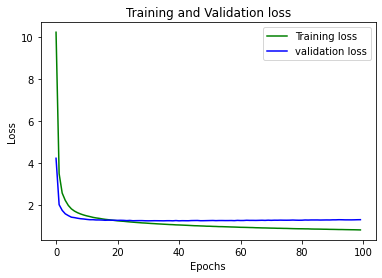

In [18]:
#model = DeepImputeModel()
#gene_dataset = GeneExpressionDataset()
trainer.train(num_epochs=100, lr=0.0001, weight_decay=None)

In [19]:
print("Running DeepImputeTrainer ...\nAccuracy: {}".format(trainer.model_score(trainer.gene_dataset.data)))

Running DeepImputeTrainer ...
Accuracy: 0.6906073482613397


In [20]:
di_model_trained = 'DeepImpute.pt'
path = F"/content/drive/My Drive/BL uploads/{di_model_trained}" 
torch.save(model.state_dict(), path)

In [21]:
output=trainer.gene_dataset.data
output.shape

(3401, 15265)

In [22]:
adata_di=adata.copy()
output = np.array(output, dtype=float)
adata_di.X = output

In [23]:
a1=adata.copy()
a2=adata_di.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


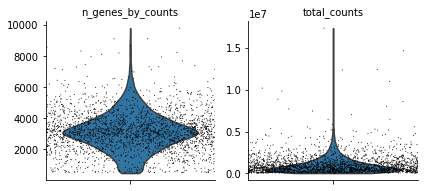

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


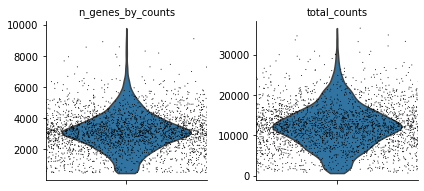

In [24]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

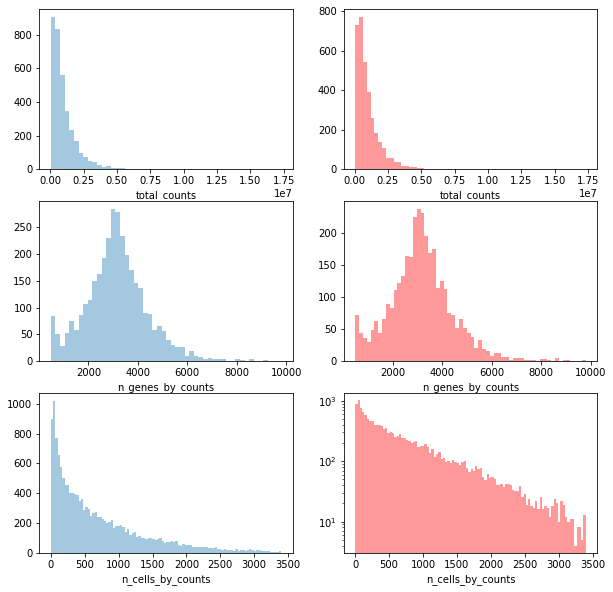

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


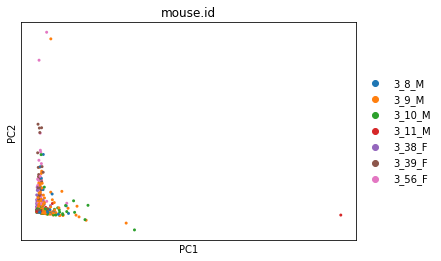

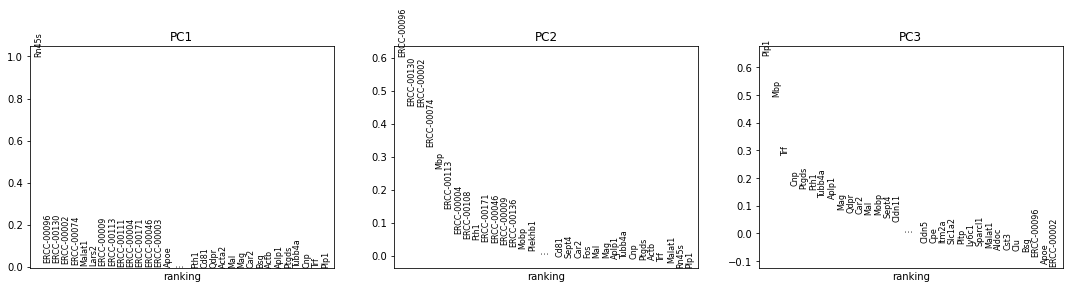

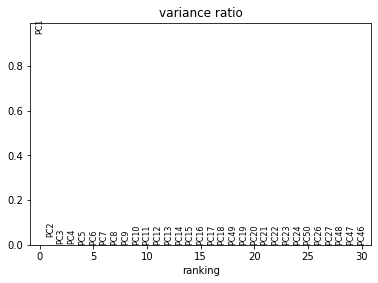

In [26]:
sc.pp.normalize_total(adata, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata) 
#sc.pl.pca_overview(adata) # plot pca
#sc.pl.pca_overview(adata, color='mouse.id')

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


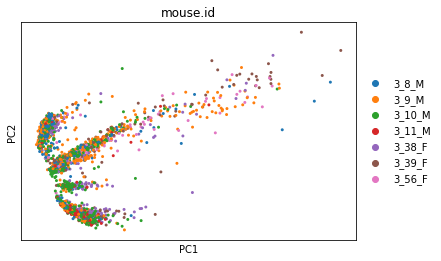

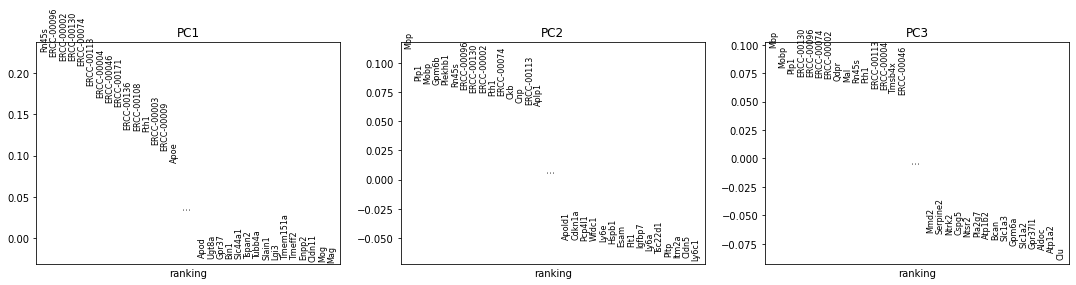

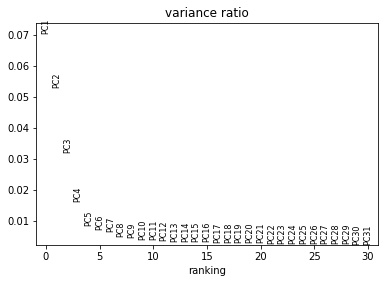

In [27]:
sc.pp.normalize_total(adata_di, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_di) 
#sc.pl.pca_overview(adata) # plot pca
#sc.pl.pca_overview(adata_di, color='mouse.id')

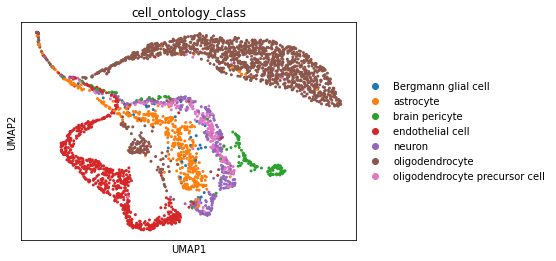

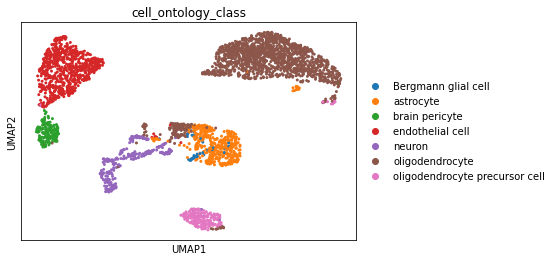

In [28]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
#sc.pl.umap(adata, color='cell_ontology_class')

sc.pp.neighbors(adata_di)
sc.tl.umap(adata_di, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='cell_ontology_class')
sc.pl.umap(adata_di, color='cell_ontology_class')

... storing 'kmeans' as categorical


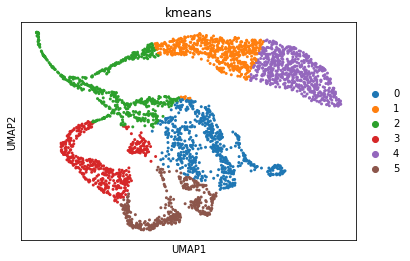

In [29]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

In [30]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.3


... storing 'kmeans' as categorical


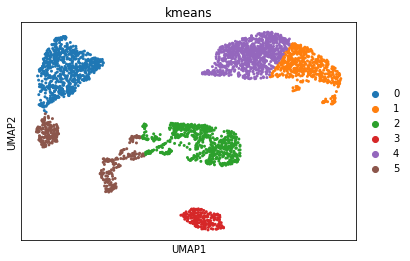

In [31]:
umap_coordinates = adata_di.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_di.obs['kmeans'] = kmeans.labels_ 
adata_di.obs['kmeans'] = adata_di.obs['kmeans'].astype(str)

sc.pl.umap(adata_di, color='kmeans') 

In [32]:
rand_index = adjusted_rand_score(labels_true = adata_di.obs['cell_ontology_class'], labels_pred = adata_di.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.57


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's


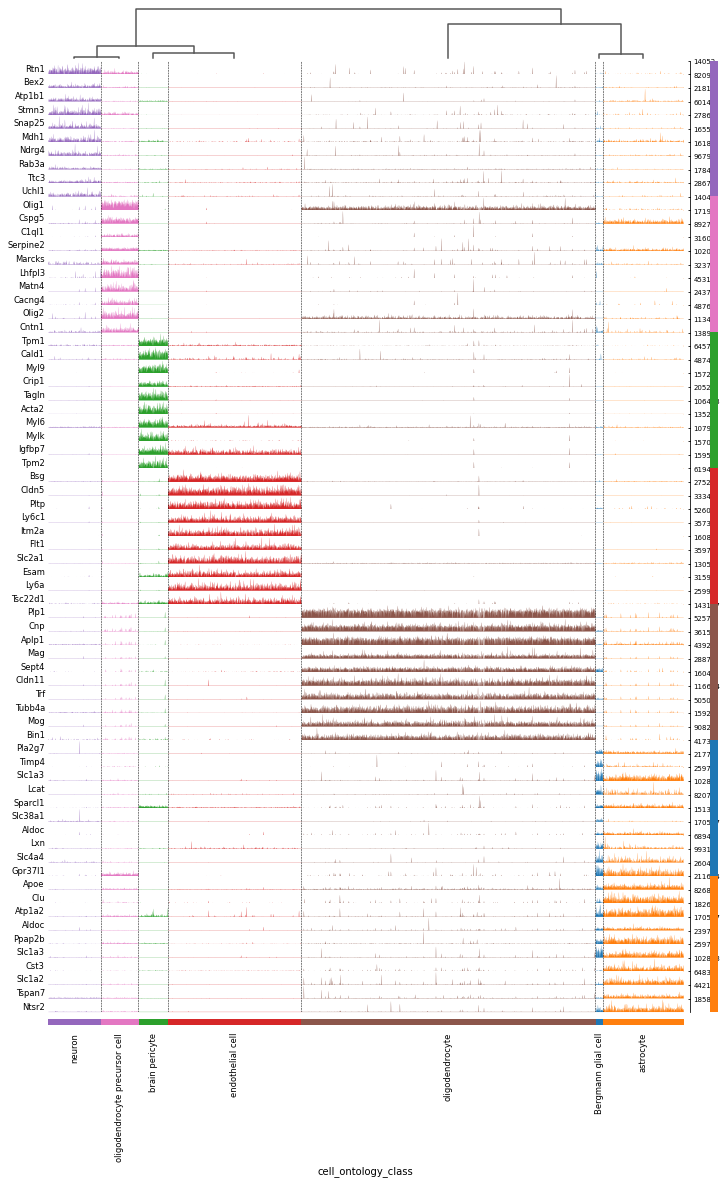

In [33]:
sc.tl.rank_genes_groups(adata, groupby='cell_ontology_class', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: overflow encountered in expm1
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's
/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:237: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (expm1_func(mean_group) + 1e-9) / (expm1_func(mean_rest) + 1e-9)  # add small value to remove 0's


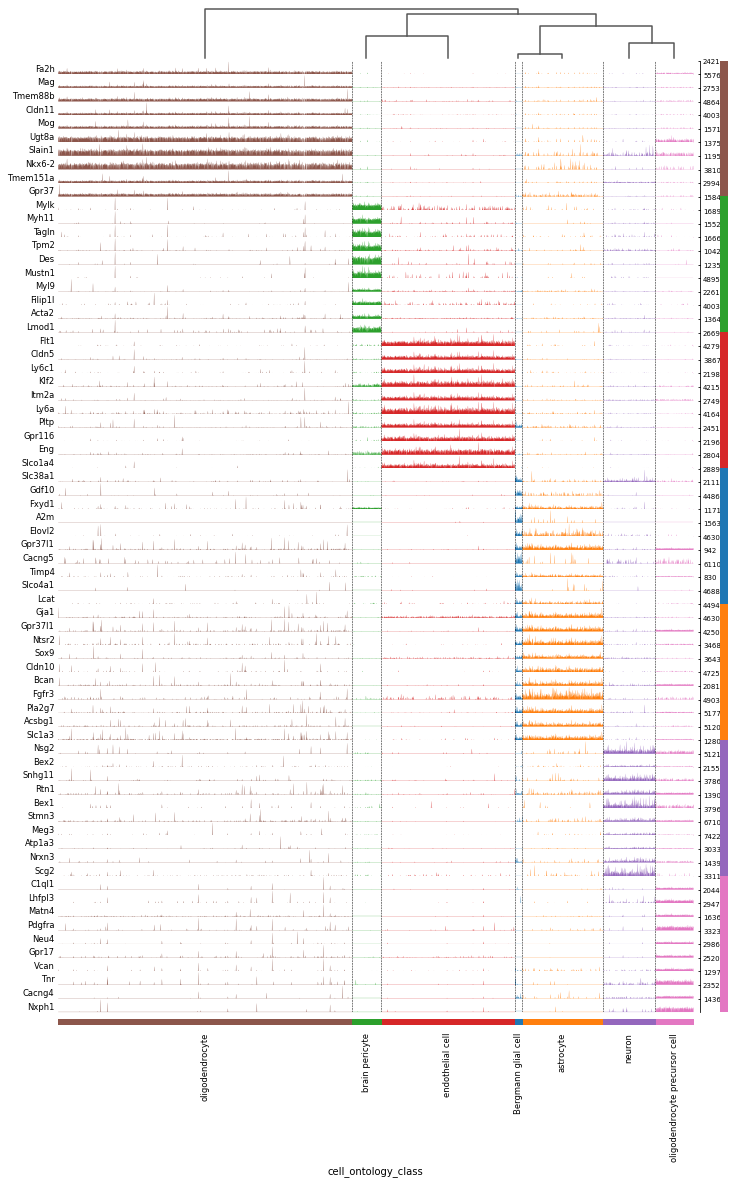

In [34]:
sc.tl.rank_genes_groups(adata_di, groupby='cell_ontology_class', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_di, groupby='cell_ontology_class') # plot the result

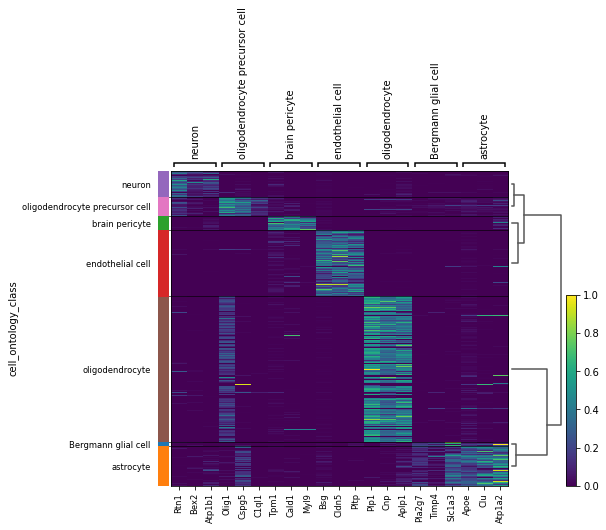

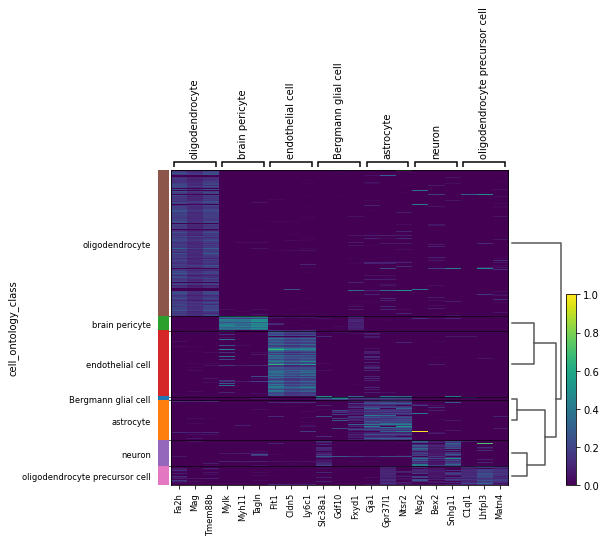

In [35]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_di, n_genes=3, standard_scale='var')